# Creating images of Circuit Topology mateices and calculating statistics

In [1]:
# Load all packages

import numpy as np
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image
from read_HiC import name_chromosomes

# Import genome_topology

from plotting_tools import set_layout
from genome_topology import normalize_psc
from genome_topology import get_matrix
from genome_topology import fractal_dimension
from genome_topology import make_graph

import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image
import networkx as nx
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import string

from genome_topology import open_pdb
from genome_topology import select_chrom
from genome_topology import geom_distance
from genome_topology import get_matrix
from genome_topology import normalize_psc
from matrix_analysis import Select_entangled_fraction

from plotting_tools import set_layout
from statistical_analysis import correlate
from statistical_analysis import comparison_distributions

# A few helper functions:
import utils 
from utils import *

# To illustrate examples
import numpy as np
import scipy.stats as sci_stats
from scipy.stats import mannwhitneyu, normaltest
from scipy.stats import kruskal

## Define the functions

## Process all cells and creating dataframe

In [2]:
cell_types = ['Monocytes','Macrophages','Macrophages-Mtb']
color_list = sns.color_palette("hls", 3)
df_list_cell_type = []

for cell_type in cell_types:
    input_path = f'/media/msbb/ssd2/Yasmine_copy/results_Sci/CT_parameters_{cell_type}/'
    save_images_path = '/media/msbb/ssd2/Yasmine_copy/results_Sci/images'
    input_files = os.listdir(input_path)
    input_files = [input_file for input_file in input_files if input_file.endswith(".pairs.csv")]
    input_files_names = [input_file[:-4] for input_file in input_files]
    input_files_paths = [f"{input_path}/{input_file}" for input_file in input_files]


    df_list = []
    # CT_prop_cells_all_df = pd.DataFrame()
    # Loop through each hic file in the directory

    for input_file_name,input_file_path in zip(input_files_names[:],input_files_paths[:]):

        # Load all cells data
        df = pd.read_csv(input_file_path, sep=',')

        # Create entangled fraction and normalized fractal dimension
        df['entangled'] = df['Parallel (%)'] + df['Cross (%)']
        df['Norm Fractal dimension'] = df['Fractal dimension'] / df['N contacts']
        df = df.rename(columns={'Unnamed: 0': 'chr'})
        df_list.append(df)

        set_layout()

    df_all_chroms = pd.concat(df_list, ignore_index=True)
    # df_all_chroms['cell_type'] = 
    df_list_cell_type.append(df_all_chroms)

### Initial resolution all cell types in one dataframe

In [163]:
cell_types = ['Monocytes','Macrophages','Macrophages-Mtb']
save_images_path = '/media/msbb/ssd2/Yasmine_copy/results_Sci/images'
color_list = sns.color_palette("hls", 3)
df_list_cell_type = []

for cell_type in cell_types:
    input_path = f'/media/msbb/ssd2/Yasmine_copy/results_Sci/CT_parameters_{cell_type}/'
    
    input_files = os.listdir(input_path)
    input_files = [input_file for input_file in input_files if input_file.endswith(".pairs.csv")]
    input_files_names = [input_file[:-4] for input_file in input_files]
    input_files_paths = [f"{input_path}/{input_file}" for input_file in input_files]


    df_list = []
    # CT_prop_cells_all_df = pd.DataFrame()
    # Loop through each hic file in the directory

    for input_file_name,input_file_path in zip(input_files_names[:],input_files_paths[:]):

        # Load all cells data
        df = pd.read_csv(input_file_path, sep=',')

        # Create entangled fraction and normalized fractal dimension
        df['Entangled'] = df['Parallel (%)'] + df['Cross (%)']
        df['Norm Fractal dimension'] = df['Fractal dimension'] / df['N contacts']
        df = df.rename(columns={'Unnamed: 0': 'chr'})
        df_list.append(df)

        set_layout()

    df_all_chroms = pd.concat(df_list, ignore_index=True)
    df_all_chroms['cell_type'] = cell_type
    df_all_chroms = df_all_chroms[df_all_chroms["chr"]!=24] # remove chromosome 24
    df_all_chroms["chr"]+=1
    df_list_cell_type.append(df_all_chroms)
    
df_all_chroms_cell_types = pd.concat(df_list_cell_type, ignore_index=True)
    

### Images for initial resolution

/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/l

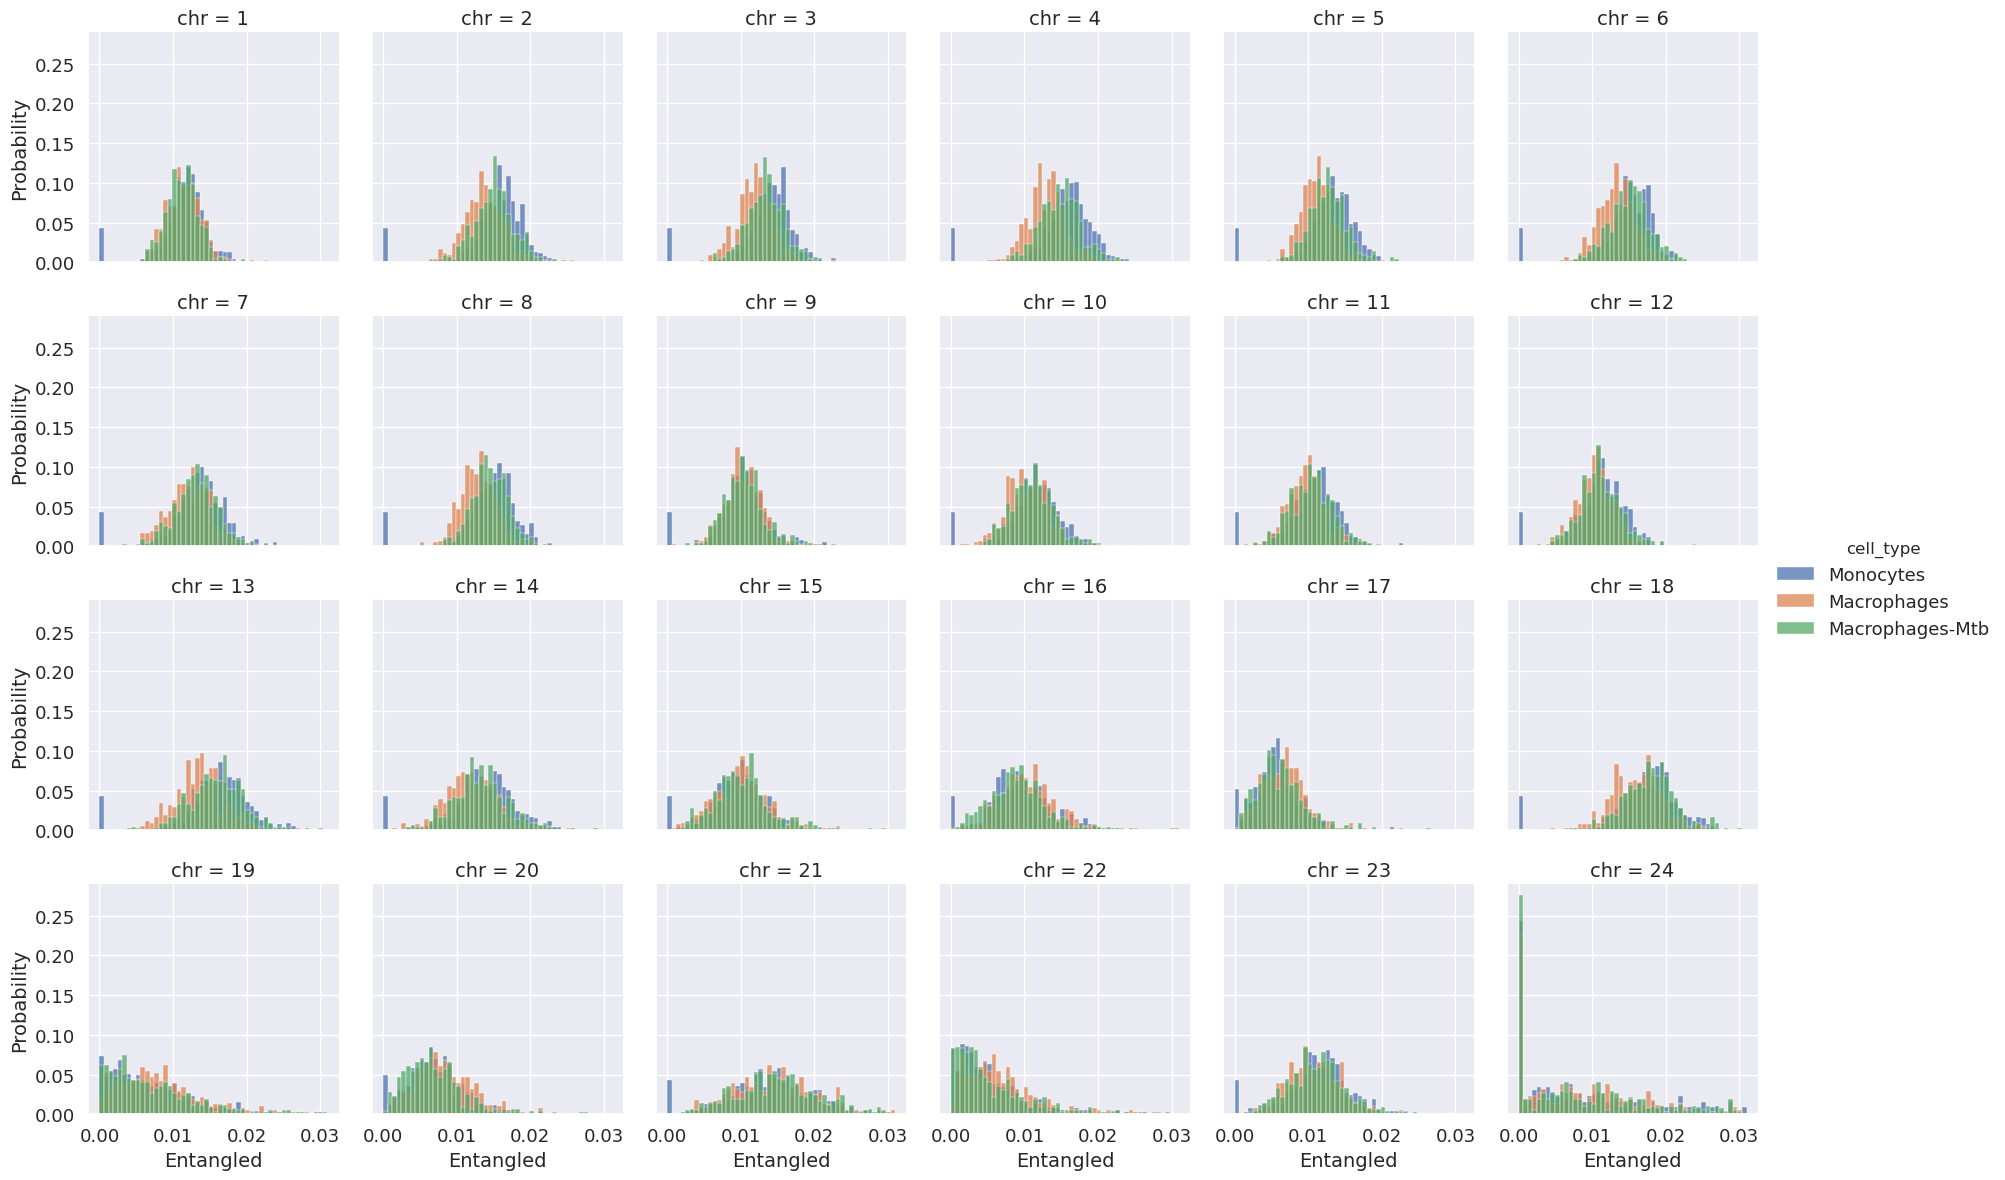

In [18]:
g = sns.FacetGrid(df_all_chroms_cell_types, 
              col="chr", 
              hue = "cell_type",  
              col_wrap=6,
              sharey=True
             )

g.map(sns.histplot, 
      "Entangled",
      binrange=(0,0.031),
      bins = 50,
      label = cell_type,
      stat = 'probability',
     )
g.add_legend()
plt.savefig(f'{save_images_path}/Entangled_histogram_all_chr_init_res.png')

/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/l

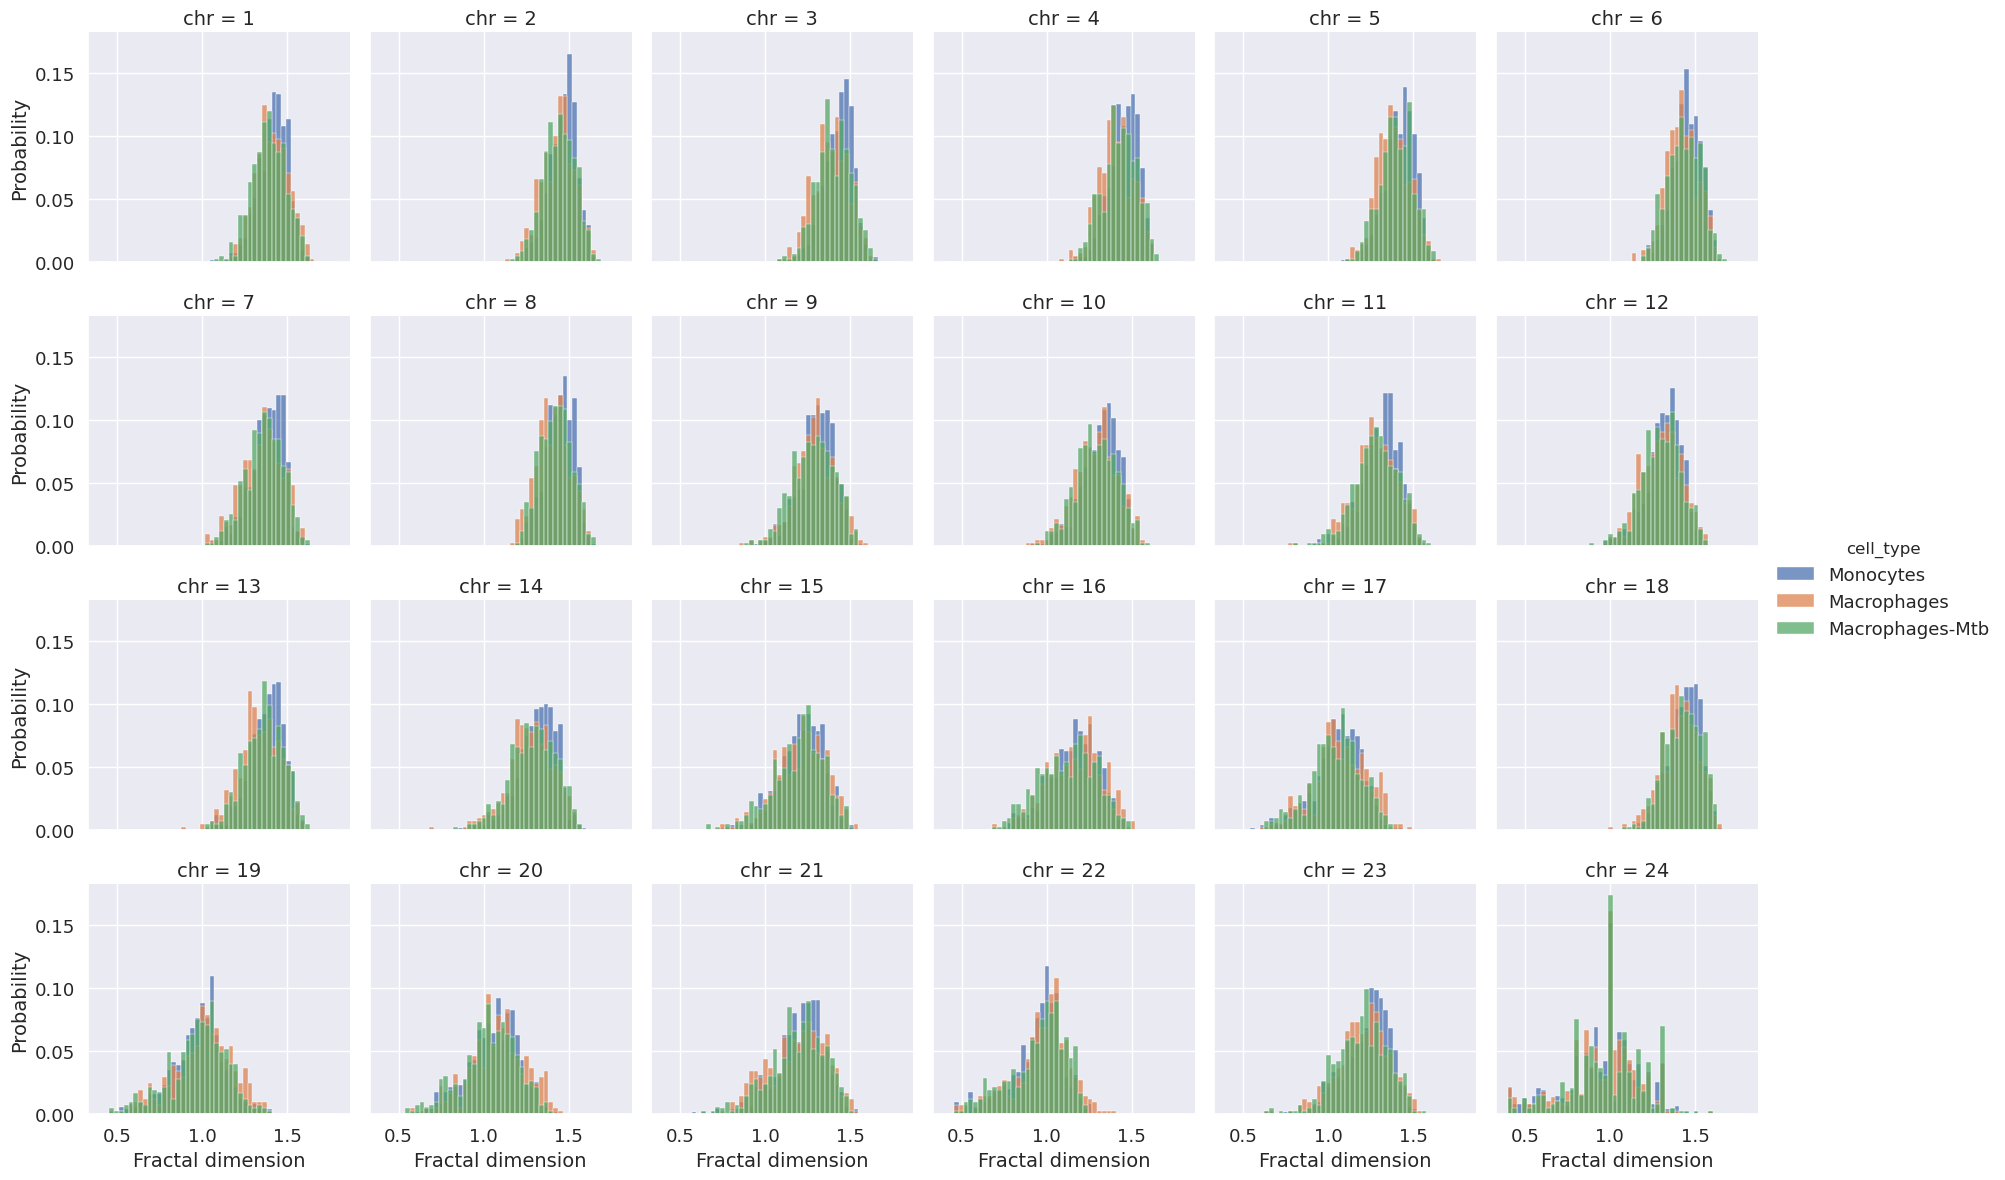

In [19]:
g = sns.FacetGrid(df_all_chroms_cell_types, col="chr", hue = "cell_type",  col_wrap=6)

g.map(sns.histplot, 
  "Fractal dimension",
  binrange=(0.4,1.8),
  bins = 50,
  label = cell_type,
  stat = 'probability',
)
g.add_legend()
plt.savefig(f'{save_images_path}/Fractal_dimension_histogram_all_chr_init_res.png')

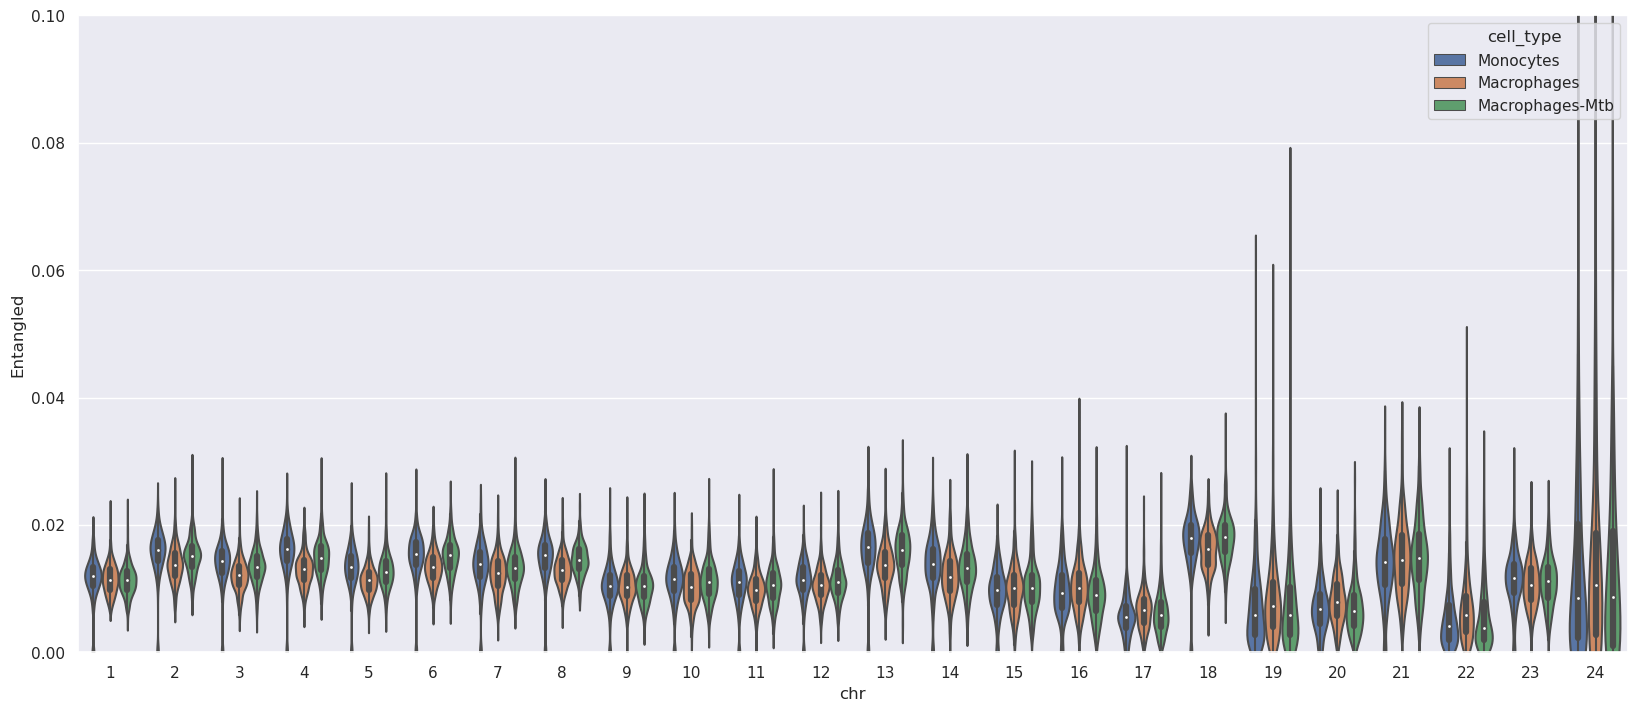

In [20]:
sns.set_theme(rc={'figure.figsize':(20,8.27)})

sns.violinplot(data=df_all_chroms_cell_types, x="chr", y="Entangled", hue="cell_type", fill=False,)
g.add_legend()

plt.ylim(0, 0.1)

plt.savefig(f'{save_images_path}/Entangled_violin_all_chr_init_res.png')

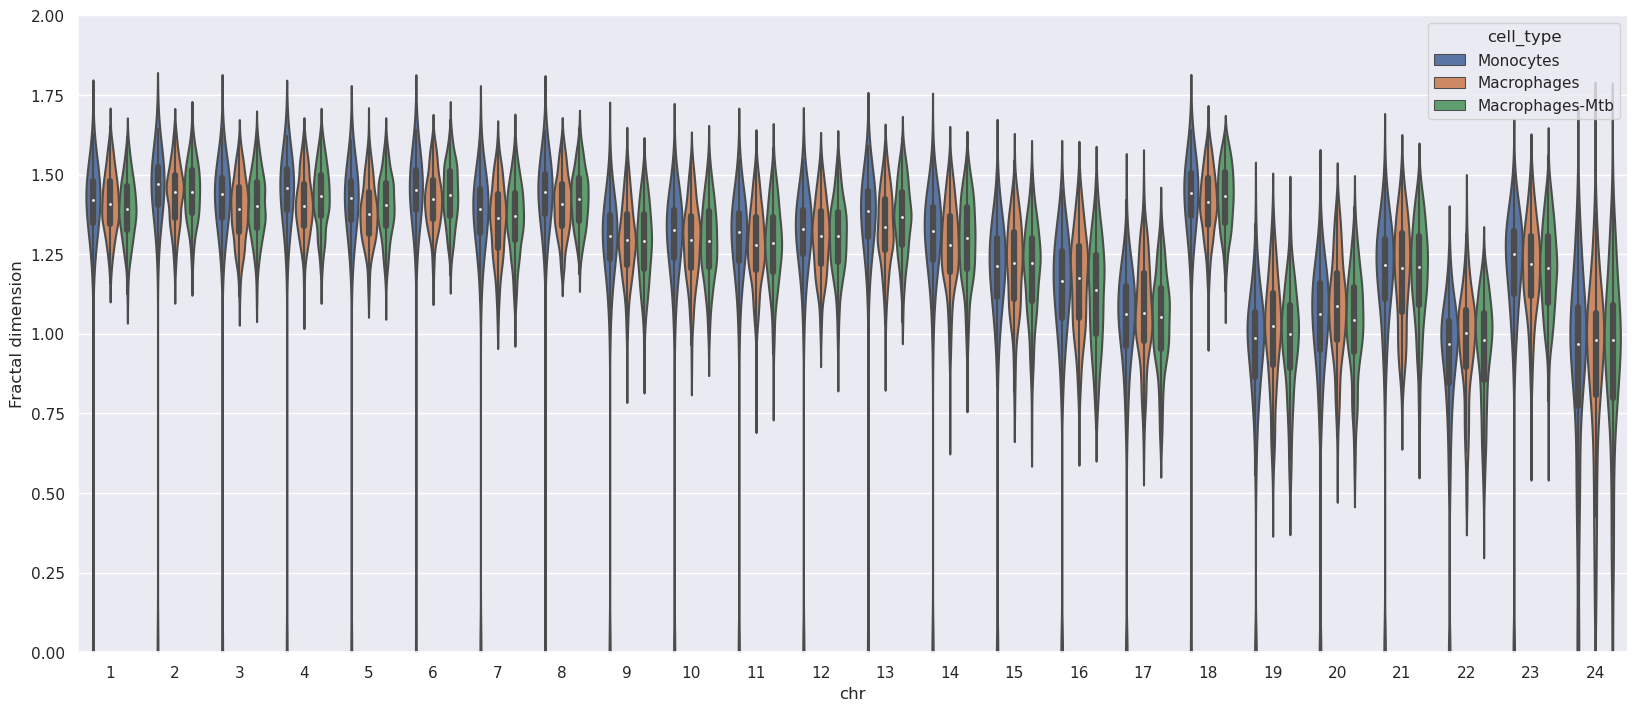

In [21]:
sns.set_theme(rc={'figure.figsize':(20,8.27)})

sns.violinplot(data=df_all_chroms_cell_types, x="chr", y="Fractal dimension", hue="cell_type", fill=False)
g.add_legend()

plt.ylim(0, 2)
plt.savefig(f'{save_images_path}/Fractal_dimension_violin_all_chr_init_res.png')

/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/l

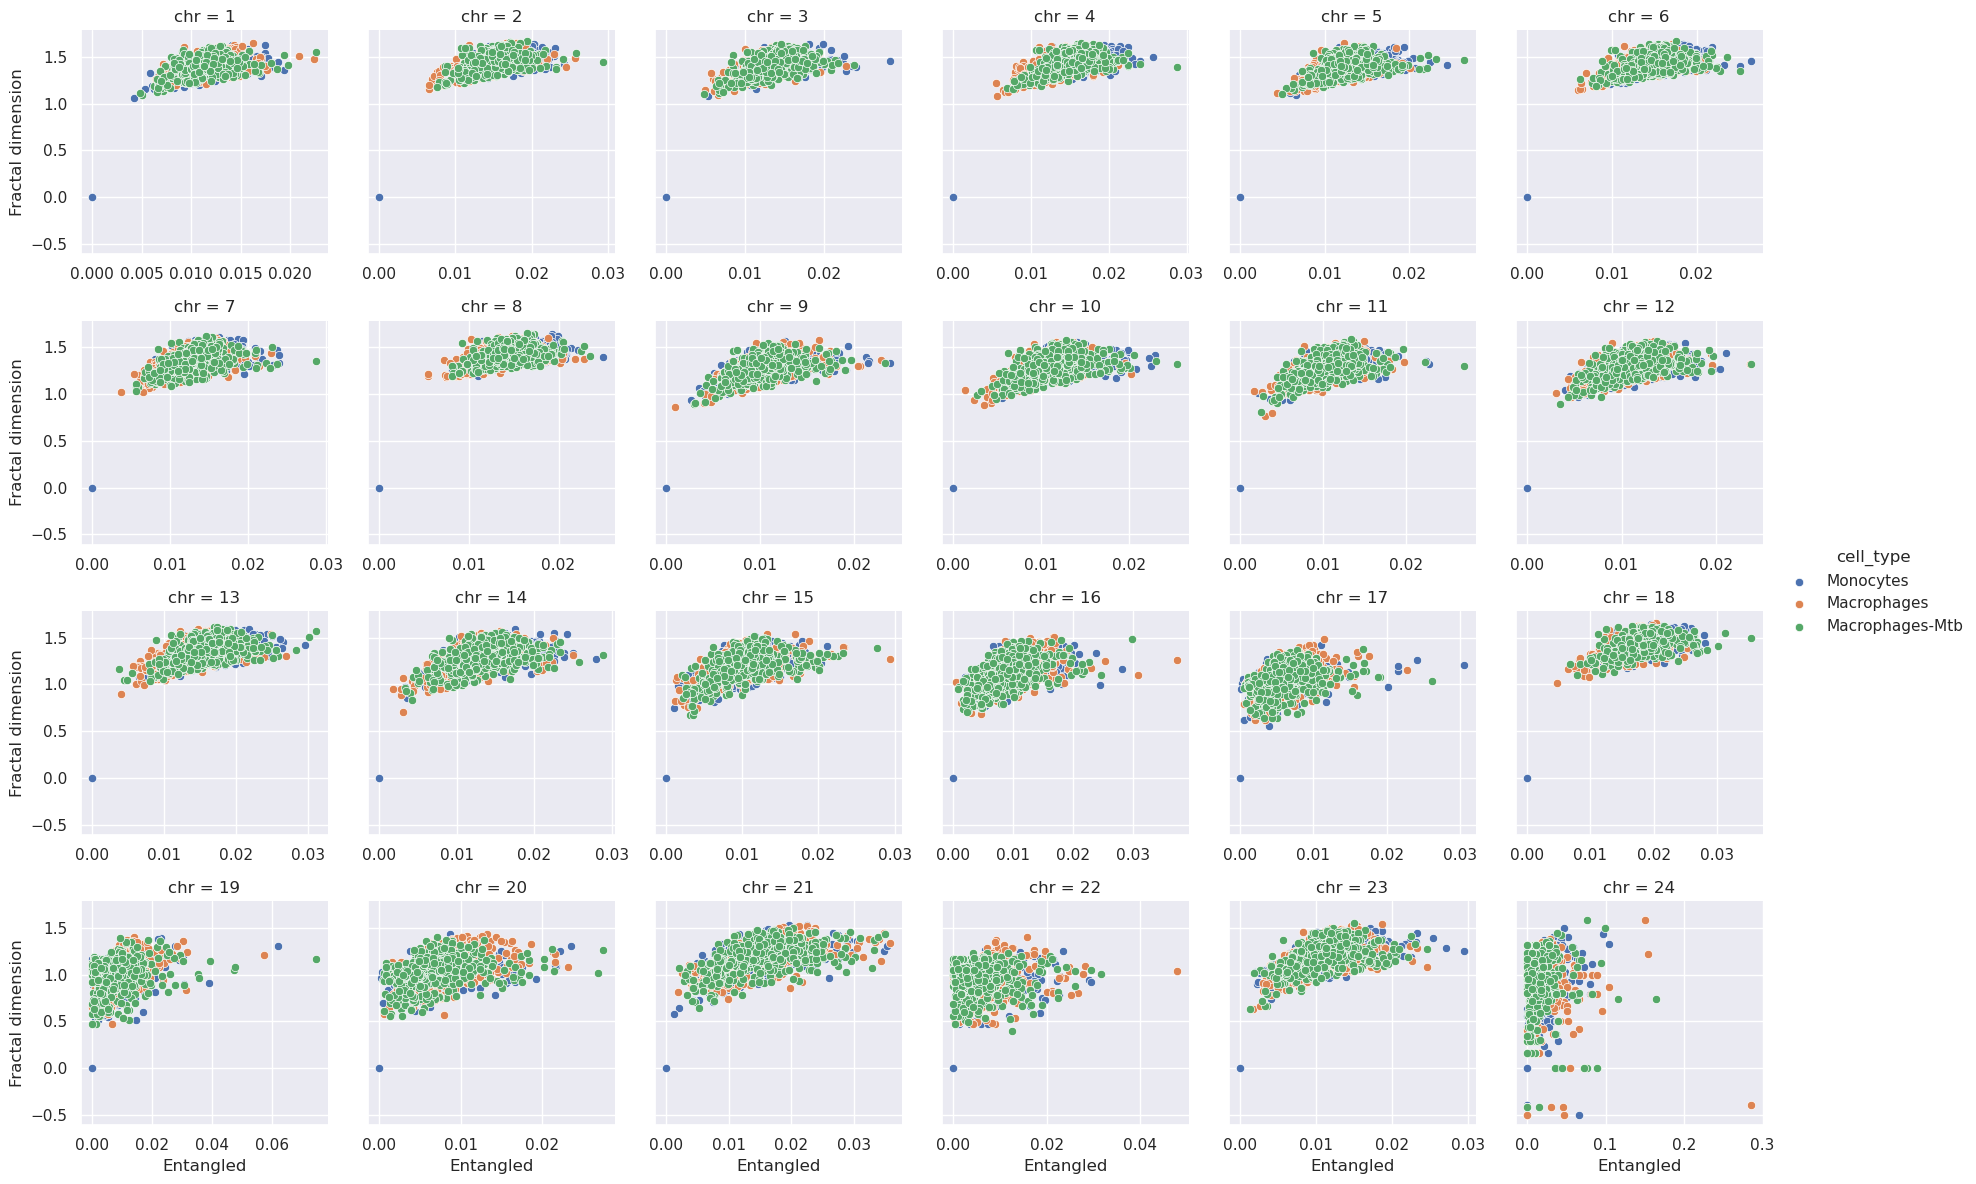

In [22]:
g = sns.FacetGrid(df_all_chroms_cell_types, 
                  col="chr", 
                  hue = "cell_type",  
                  col_wrap=6,
                  sharex=False)

g.map(sns.scatterplot, 
      "Entangled",
      "Fractal dimension",
      label = cell_type,
)
g.add_legend()

## Different resolutions CT separatly

In [102]:
discretisation_steps = ["10e3", "5e4", "10e4", "5e5", "10e5"]
step = discretisation_steps[4]

In [103]:
import seaborn as sns
cell_types = ['Monocyte','Macrophage','Macrophage-Mtb']
color_list = sns.color_palette("hls", 3)
df_list_cell_type = []

for cell_type in cell_types:
    input_path = f'/media/msbb/ssd2/Yasmine_copy/results_Sci/Resolutions_v1/{step}/{cell_type}/CT_parameters'
    save_images_path = '/media/msbb/ssd2/Yasmine_copy/results_Sci/images'
    input_files = os.listdir(input_path)
    input_files = [input_file for input_file in input_files if input_file.endswith(".pairs.csv")]
    input_files_names = [input_file[:-4] for input_file in input_files]
    input_files_paths = [f"{input_path}/{input_file}" for input_file in input_files]


    df_list = []

    # Loop through each hic file in the directory

    for input_file_name,input_file_path in zip(input_files_names[:],input_files_paths[:]):

        # Load all cells data
        df = pd.read_csv(input_file_path, sep=',')

        # Create entangled fraction and normalized fractal dimension
        df['Entangled'] = df['Parallel (%)'] + df['Cross (%)']
        df['Norm Fractal dimension'] = df['Fractal dimension'] / df['N contacts']
        df = df.rename(columns={'Unnamed: 0': 'chr'})
        df_list.append(df)

        set_layout()

    df_all_chroms = pd.concat(df_list, ignore_index=True)
    df_all_chroms['cell_type'] = cell_type
    df_all_chroms = df_all_chroms[df_all_chroms["chr"]!=22] # remove chromosome 24
    df_all_chroms["chr"]+=1
    df_list_cell_type.append(df_all_chroms)
    
df_all_chroms_cell_types = pd.concat(df_list_cell_type, ignore_index=True)
    

In [ ]:
#Delete all zeros in entangled
df=df_all_chroms_cell_types
df = df[df.Entangled != 0]

### Make images for different resolutions

/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/l

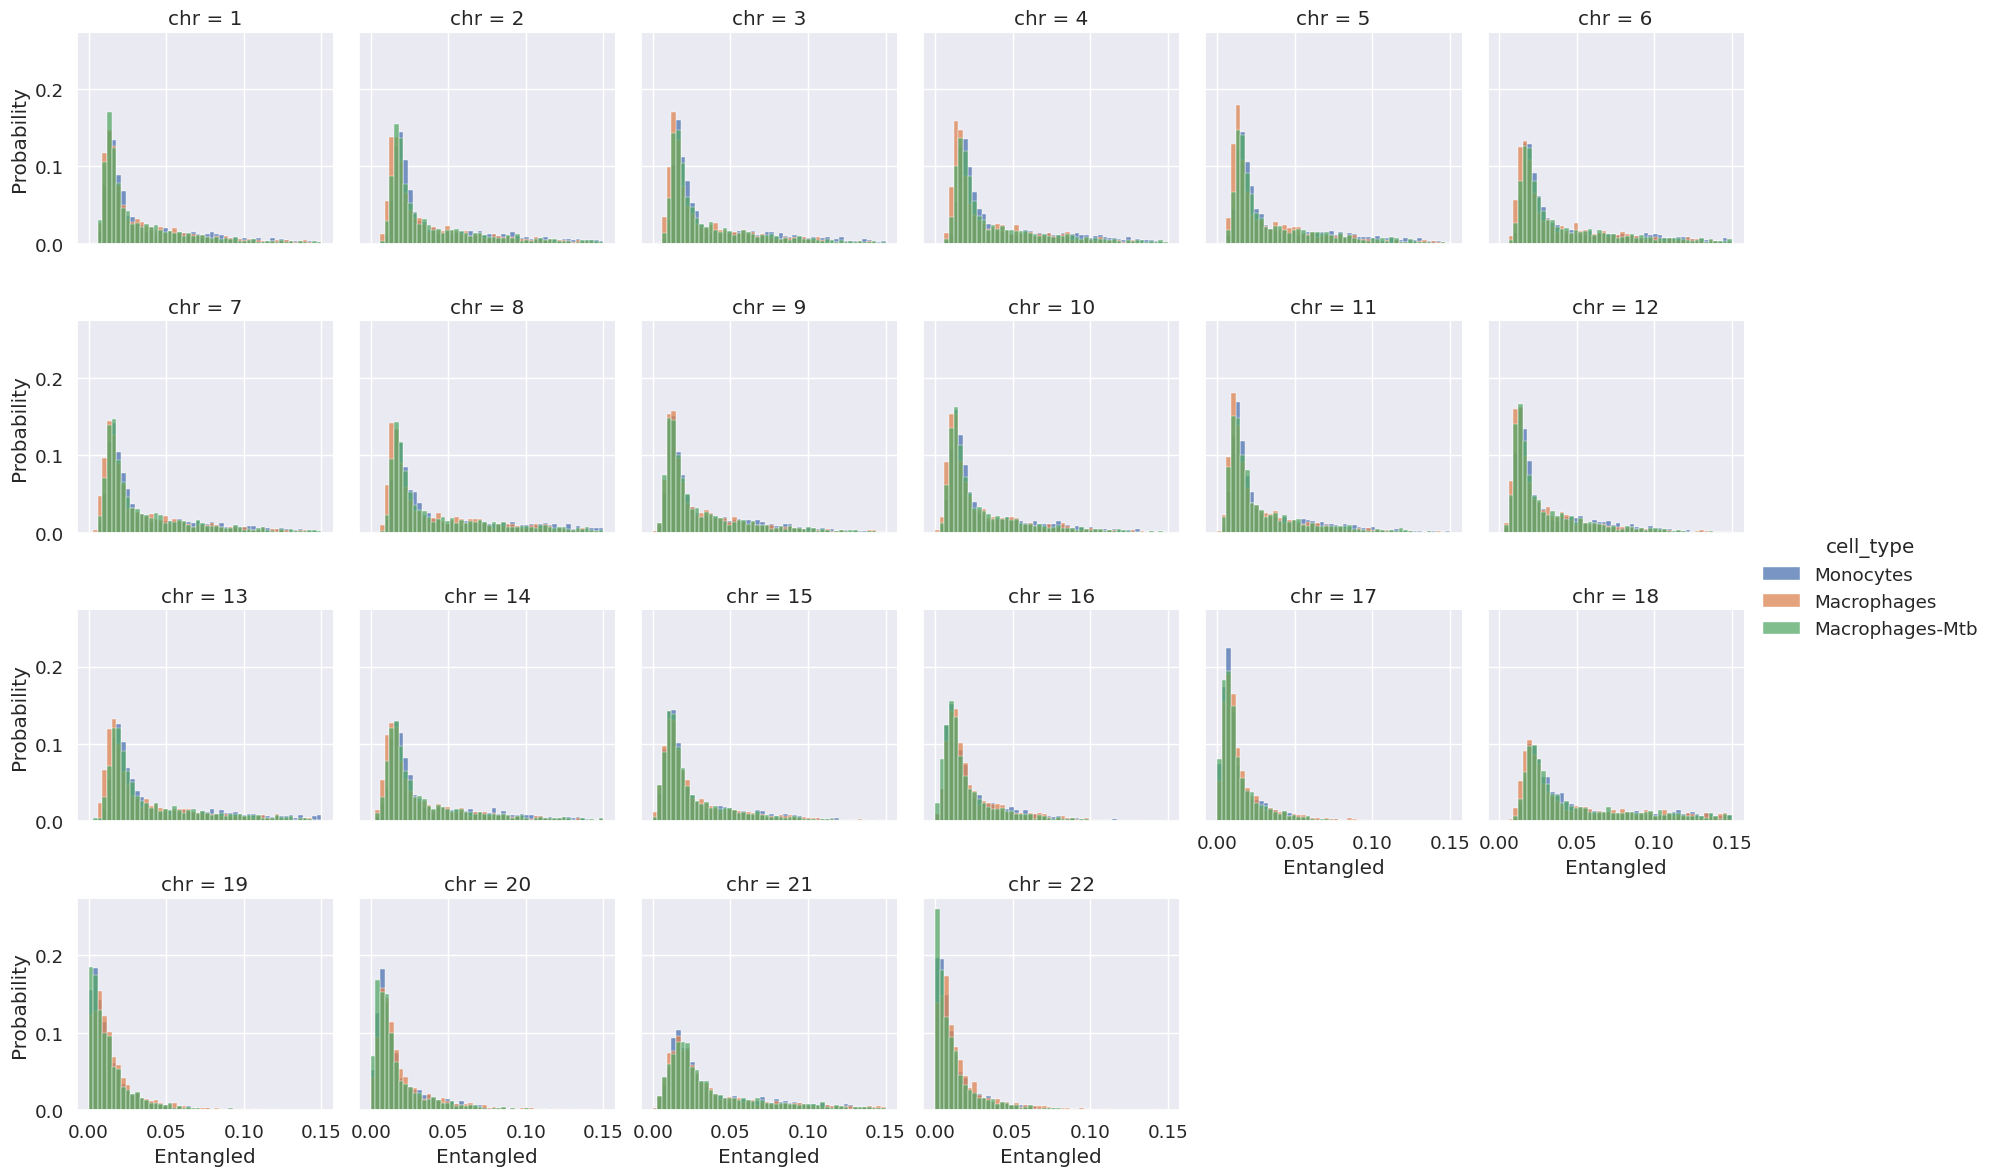

In [120]:
g = sns.FacetGrid(df_all_chroms_cell_types, 
              col="chr", 
              hue = "cell_type",  
              col_wrap=6,
              sharey=True
             )

g.map(sns.histplot, 
      "Entangled",
      binrange=(0,0.15),
      bins = 50,
      label = cell_type,
      stat = 'probability',
     )
g.add_legend()
plt.savefig(f'{save_images_path}/Entangled_histogram_all_chr_{step}_res.png')

In [ ]:
g = sns.FacetGrid(df_all_chroms_cell_types, col="chr", hue = "cell_type",  col_wrap=6)

g.map(sns.histplot, 
  "Fractal dimension",
  binrange=(0.4,2.4),
  bins = 50,
  label = cell_type,
  stat = 'probability',
)
g.add_legend()
plt.savefig(f'{save_images_path}/Fractal_dimension_histogram_all_chr_{step}_res.png')

In [ ]:
sns.set_theme(rc={'figure.figsize':(20,8.27)})

sns.violinplot(data=df_all_chroms_cell_types, x="chr", y="Entangled", hue="cell_type", fill=False,)
g.add_legend()

plt.savefig(f'{save_images_path}/Entangled_violin_all_chr_{step}_res.png')

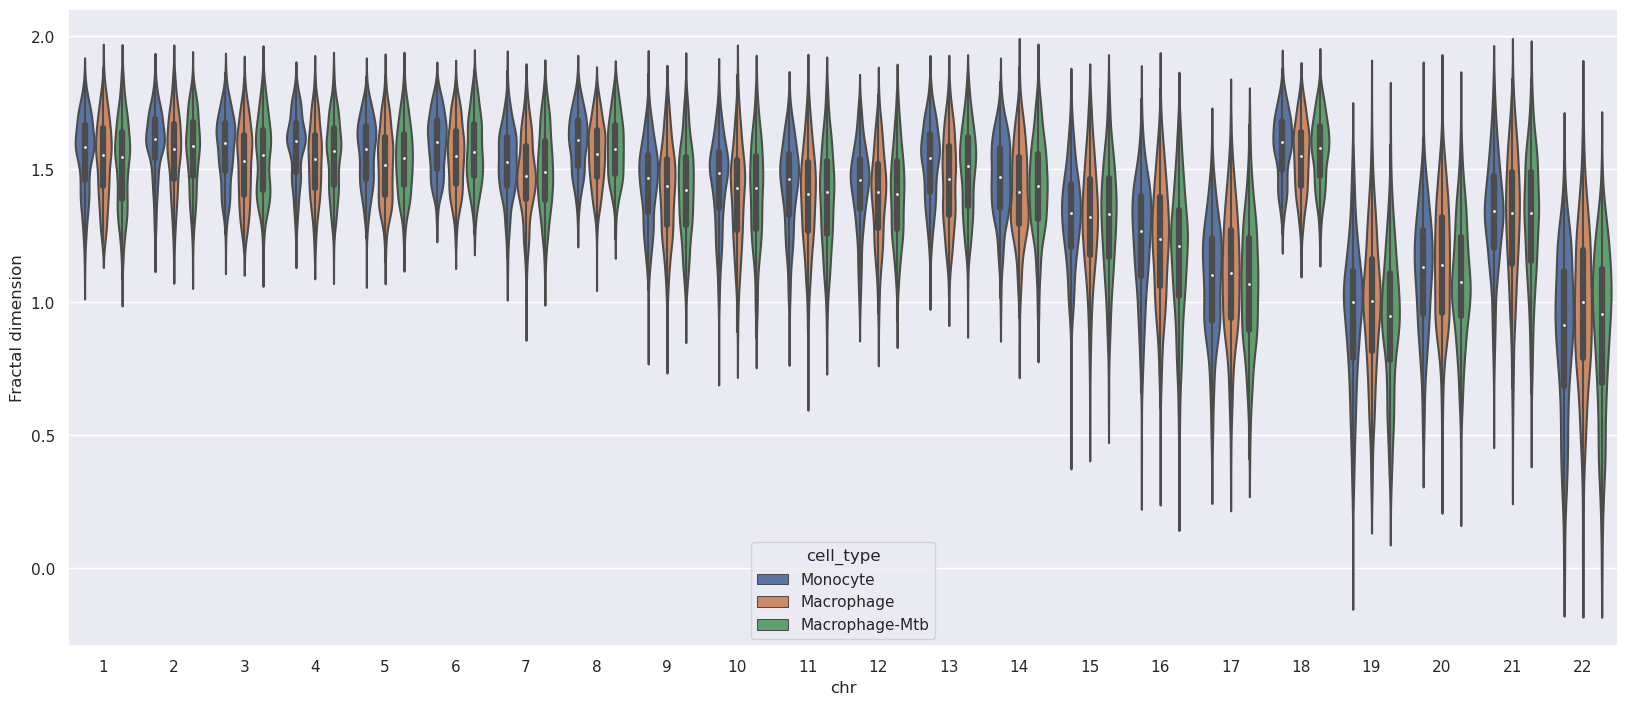

In [26]:
sns.set_theme(rc={'figure.figsize':(20,8.27)})

sns.violinplot(data=df_all_chroms_cell_types, x="chr", y="Fractal dimension", hue="cell_type", fill=False)
g.add_legend()

plt.savefig(f'{save_images_path}/Fractal_dimension_violin_all_chr_{step}_res.png')

/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/l

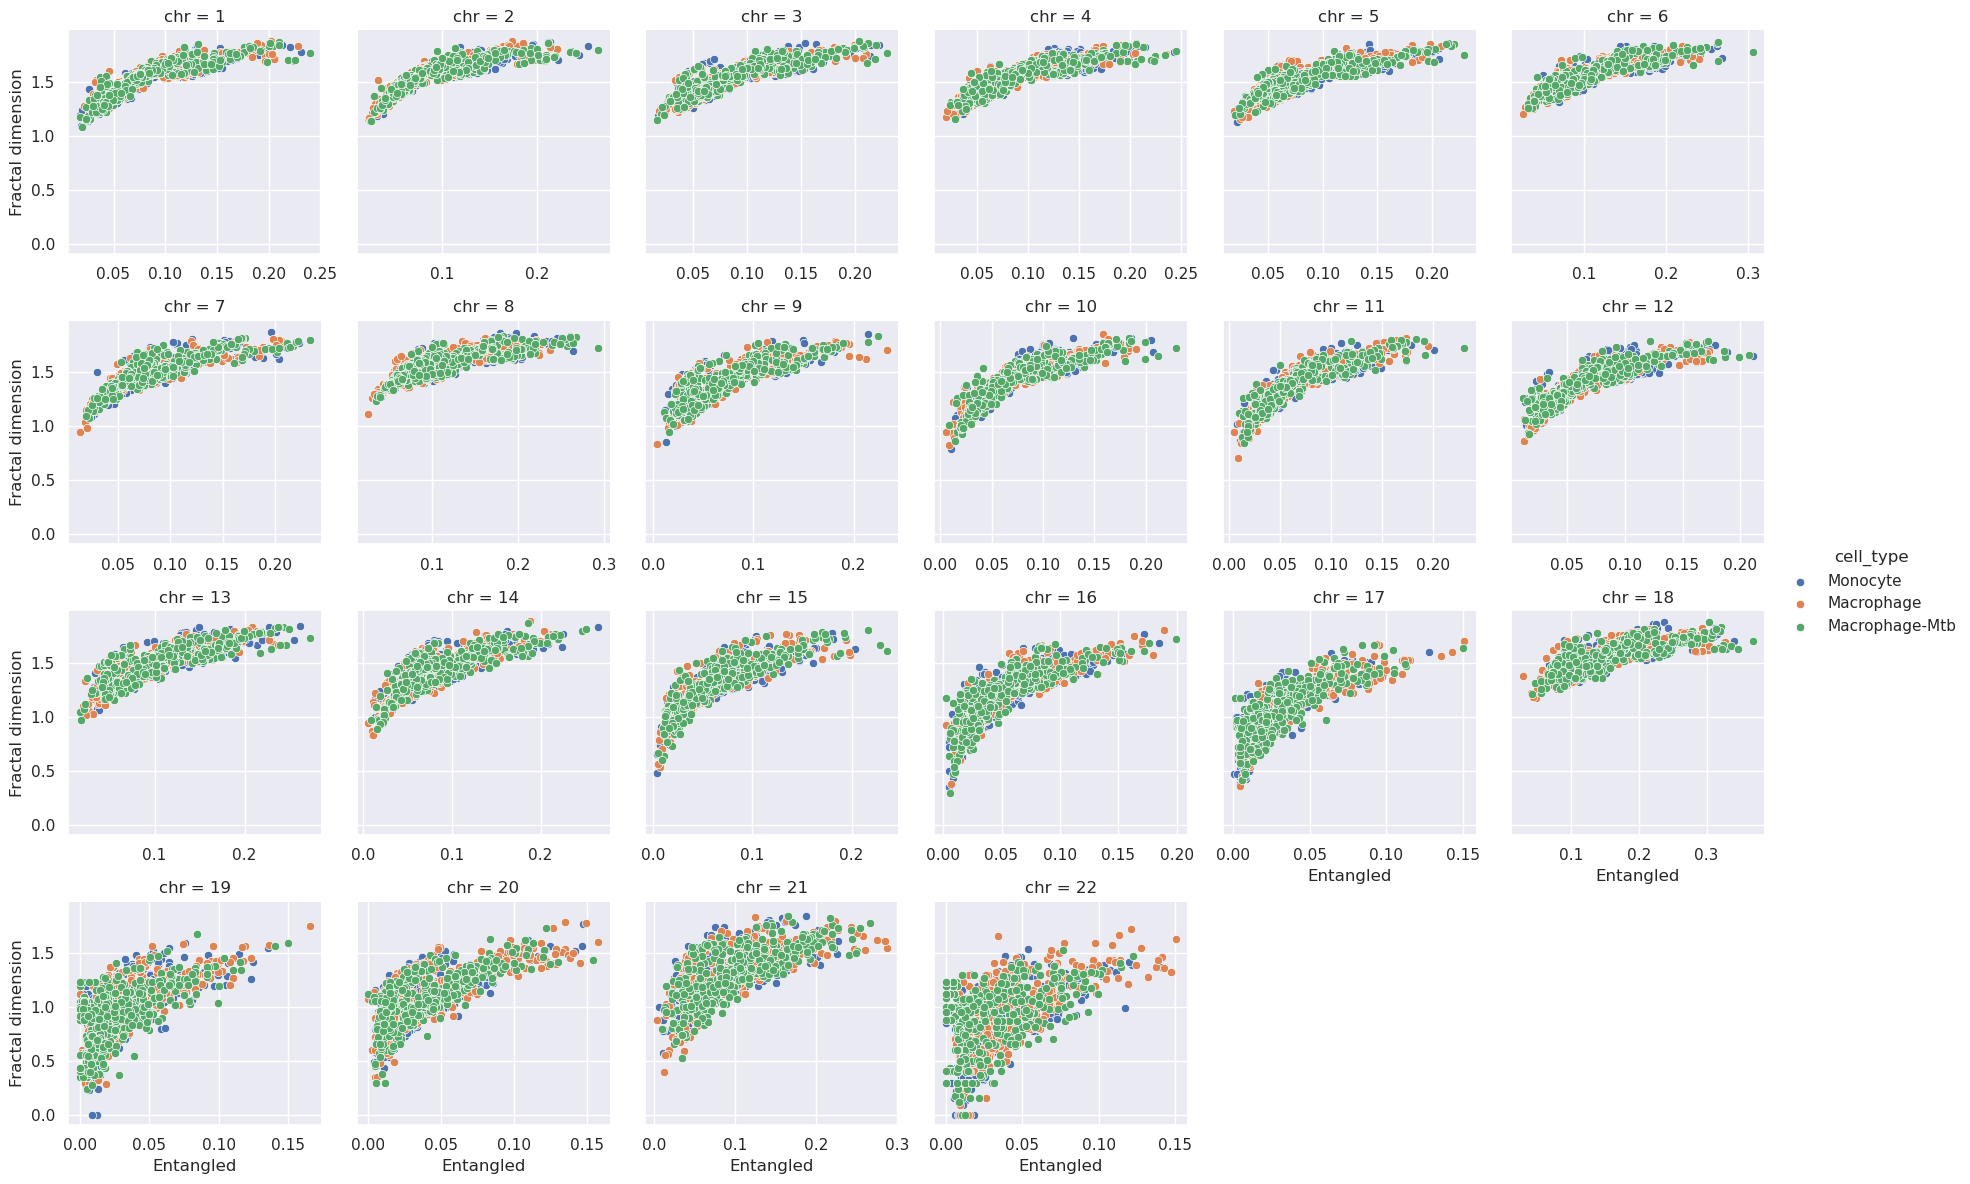

In [27]:
g = sns.FacetGrid(df_all_chroms_cell_types, 
                  col="chr", 
                  hue = "cell_type",  
                  col_wrap=6,
                  sharex=False)

g.map(sns.scatterplot, 
      "Entangled",
      "Fractal dimension",
      label = cell_type,
)
g.add_legend()

## All resolutions and cell types in one data frame

In [167]:
import seaborn as sns
cell_types = ['Monocytes','Macrophages','Macrophages-Mtb']
save_images_path = '/media/msbb/ssd2/Yasmine_copy/results_Sci/images'
color_list = sns.color_palette("hls", 3)
df_all_chroms_cell_types_list =[]
df_list_cell_type = []

###### Initial resolution ######
for cell_type in cell_types:
    input_path = f'/media/msbb/ssd2/Yasmine_copy/results_Sci/CT_parameters_{cell_type}/'
    
    input_files = os.listdir(input_path)
    input_files = [input_file for input_file in input_files if input_file.endswith(".pairs.csv")]
    input_files_names = [input_file[:-4] for input_file in input_files]
    input_files_paths = [f"{input_path}/{input_file}" for input_file in input_files]


    df_list = []
    # CT_prop_cells_all_df = pd.DataFrame()
    # Loop through each hic file in the directory

    for input_file_name,input_file_path in zip(input_files_names[:],input_files_paths[:]):

        # Load all cells data
        df = pd.read_csv(input_file_path, sep=',')

        # Create entangled fraction and normalized fractal dimension
        df['Entangled'] = df['Parallel (%)'] + df['Cross (%)']
        df['Norm Fractal dimension'] = df['Fractal dimension'] / df['N contacts']
        df = df.rename(columns={'Unnamed: 0': 'chr'})
        df_list.append(df)

        set_layout()

    df_all_chroms = pd.concat(df_list, ignore_index=True)
    df_all_chroms['cell_type'] = cell_type
    df_all_chroms['resolution'] = "1e0"
    df_all_chroms = df_all_chroms[df_all_chroms["chr"]<22] # remove chromosome 24
    df_all_chroms["chr"]+=1
    df_list_cell_type.append(df_all_chroms)
    
df_all_chroms_cell_types = pd.concat(df_list_cell_type, ignore_index=True)
df_all_chroms_cell_types_list.append(df_all_chroms_cell_types)

###### Coarse Grained resolutions ######
discretisation_steps = ["10e3", "5e4", "10e4", "5e5", "10e5"]
df_list_cell_type = []

for step in discretisation_steps:
    for cell_type in cell_types:
        input_path = f'/media/msbb/ssd2/Yasmine_copy/results_Sci/Resolutions_v3/{step}/{cell_type}/CT_parameters'
        save_images_path = '/media/msbb/ssd2/Yasmine_copy/results_Sci/images'
        input_files = os.listdir(input_path)
        input_files = [input_file for input_file in input_files if input_file.endswith(".pairs.csv")]
        input_files_names = [input_file[:-4] for input_file in input_files]
        input_files_paths = [f"{input_path}/{input_file}" for input_file in input_files]

    
        df_list = []
        # CT_prop_cells_all_df = pd.DataFrame()
        # Loop through each hic file in the directory
    
        for input_file_name,input_file_path in zip(input_files_names[:],input_files_paths[:]):
    
            # Load all cells data
            df = pd.read_csv(input_file_path, sep=',')
            
            # Create entangled fraction and normalized fractal dimension
            df['Entangled'] = df['Parallel (%)'] + df['Cross (%)']
            df['Norm Fractal dimension'] = df['Fractal dimension'] / df['N contacts']
            df = df.rename(columns={'Unnamed: 0': 'chr'})
            df_list.append(df)
            
            set_layout()
            
        df_all_chroms = pd.concat(df_list, ignore_index=True)
        df_all_chroms['cell_type'] = cell_type
        df_all_chroms['resolution'] = step
        df_all_chroms = df_all_chroms[df_all_chroms["chr"]!=22] # remove chromosome 23
        df_all_chroms["chr"]+=1
        df_list_cell_type.append(df_all_chroms)
        
    df_all_chroms_cell_types = pd.concat(df_list_cell_type, ignore_index=True)
    df_all_chroms_cell_types_list.append(df_all_chroms_cell_types)

df_all_chroms_resolutions = pd.concat(df_all_chroms_cell_types_list, ignore_index=True)

df_all_chroms_resolutions = df_all_chroms_resolutions[df_all_chroms_resolutions['Entangled'] != 0]

### Detect the effect of resolution on data

/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/sit

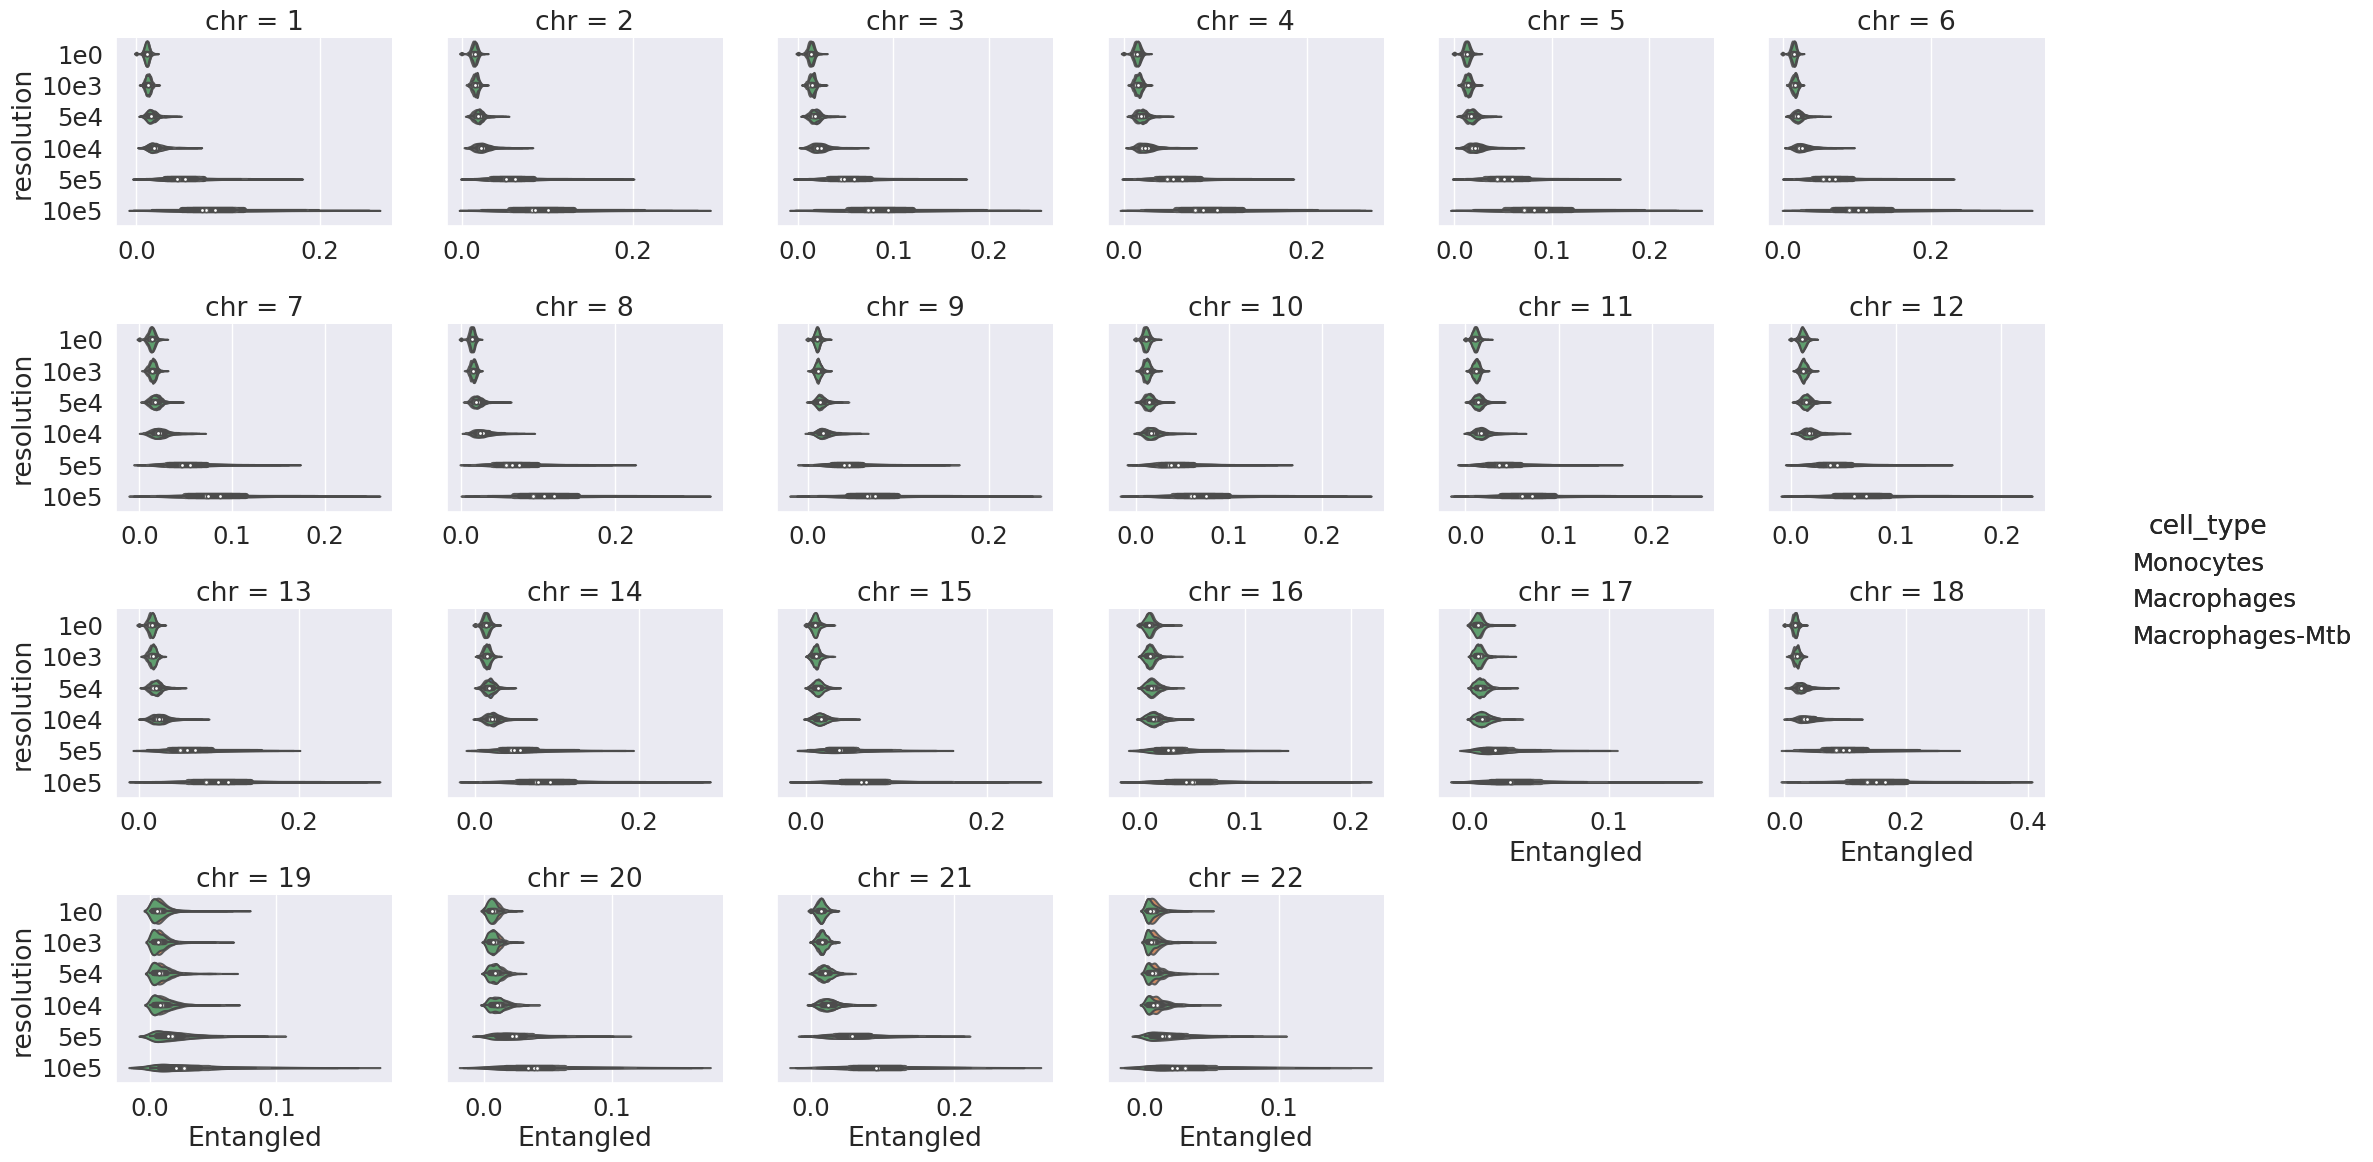

In [59]:
sns.set_theme(rc={'figure.figsize':(20,8.27)})
color_list = sns.color_palette("hls", 3)
sns.set(font_scale=1.6)
g.add_legend()
g = sns.FacetGrid(df_all_chroms_resolutions, 
                  col="chr", 
                  hue = "cell_type",  
                  col_wrap=6,
                  sharex=False)
g.add_legend()
g.map(sns.violinplot, 
      "Entangled",
      "resolution",
      label = cell_type,
      fill=False,
      native_scale=True,  
      # split=True
)
g.add_legend()

plt.savefig('/home/msbb/Figures_for_thesis/Entangled_violin_all_chr_all_res_v2.png')


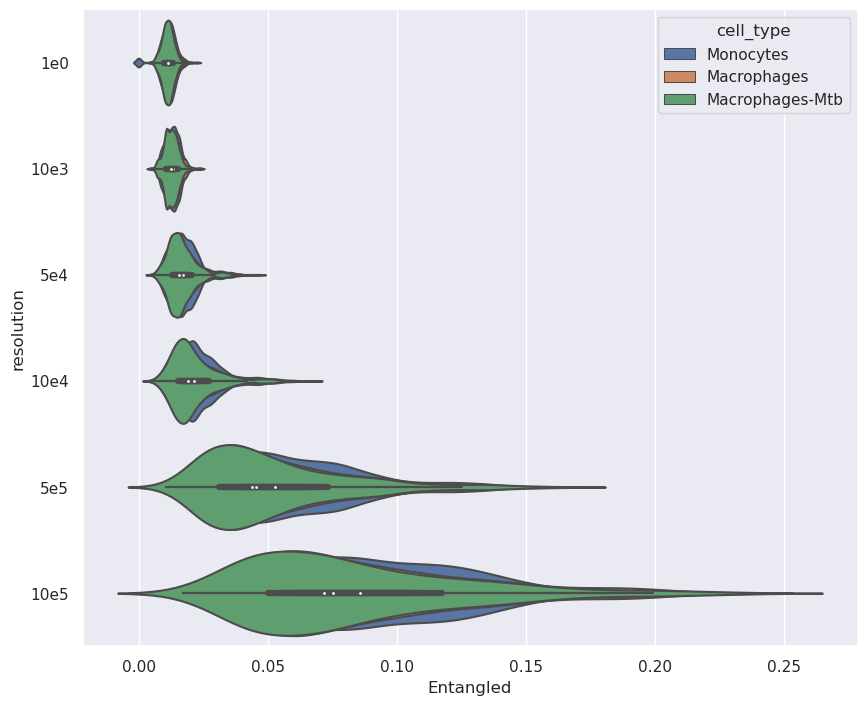

In [58]:
sns.set_theme(rc={'figure.figsize':(10,8.27)})
color_list = sns.color_palette("hls", 3)

sns.violinplot(
    data=df_all_chroms_resolutions[df_all_chroms_resolutions['chr']==1], 
      x="Entangled",
      y="resolution",
      label = cell_type,
      dodge = False,
      hue = 'cell_type',
      # inner="point",
      fill=False,
      native_scale=True,  
    )
g.add_legend()

#plt.savefig(f'{save_images_path}/Entangled_violin_all_chr_all_res_v2.png')
plt.savefig('/home/msbb/Figures_for_thesis/Entangled_violin_all_chr__res_v2.png')

/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/sit

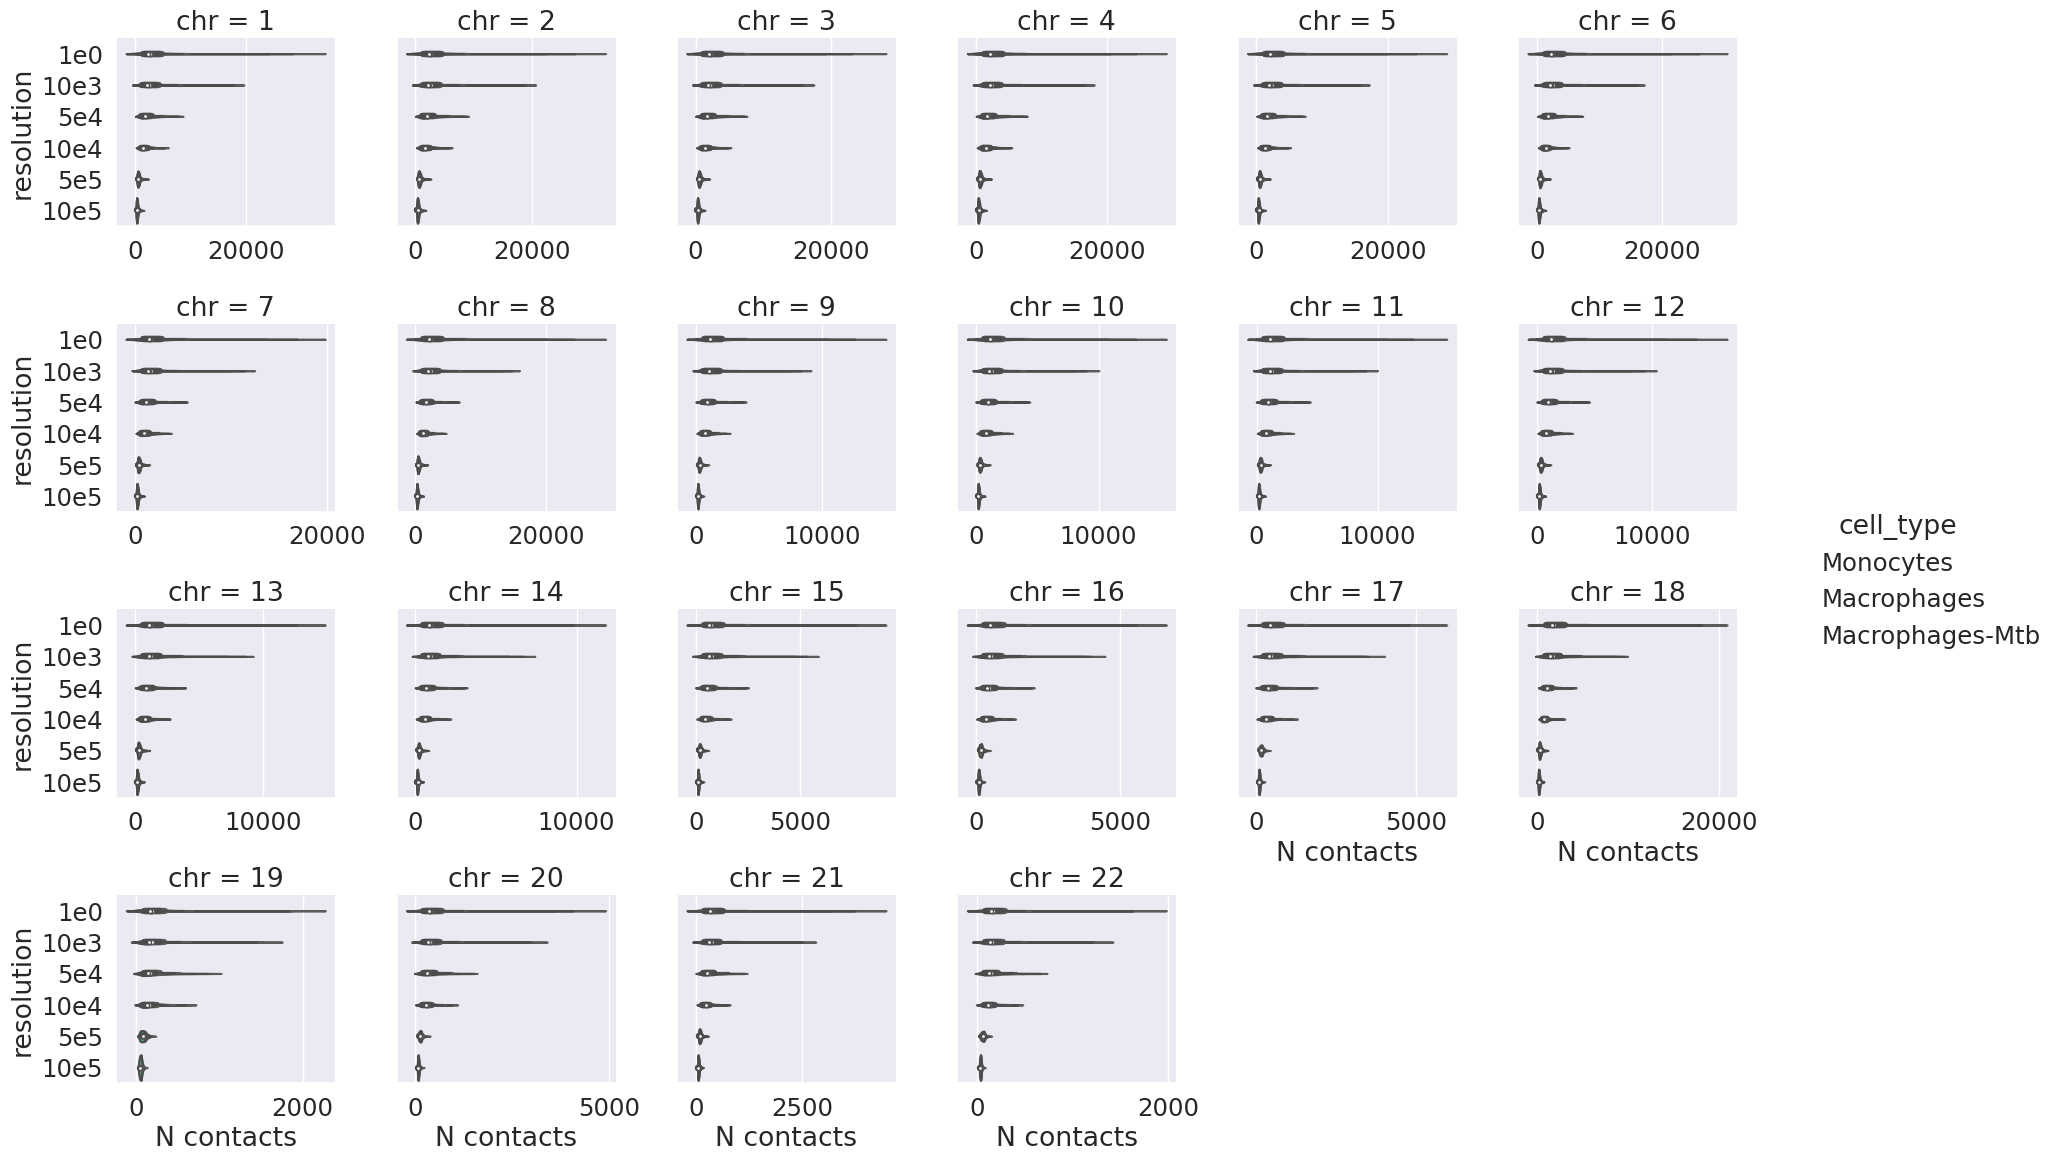

In [68]:
sns.set_theme(rc={'figure.figsize':(20,8.27)})
sns.set(font_scale=1.6)
g = sns.FacetGrid(df_all_chroms_resolutions, 
                  col="chr", 
                  hue = "cell_type",  
                  col_wrap=6,
                  sharex=False)

g.map(sns.violinplot, 
      "N contacts",
      "resolution",
      label = cell_type,
      fill=False,
      native_scale=True
)
g.add_legend()

plt.savefig('/home/msbb/Figures_for_thesis/N_contacts_violin_all_chr__res_v2.png')

/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/sit

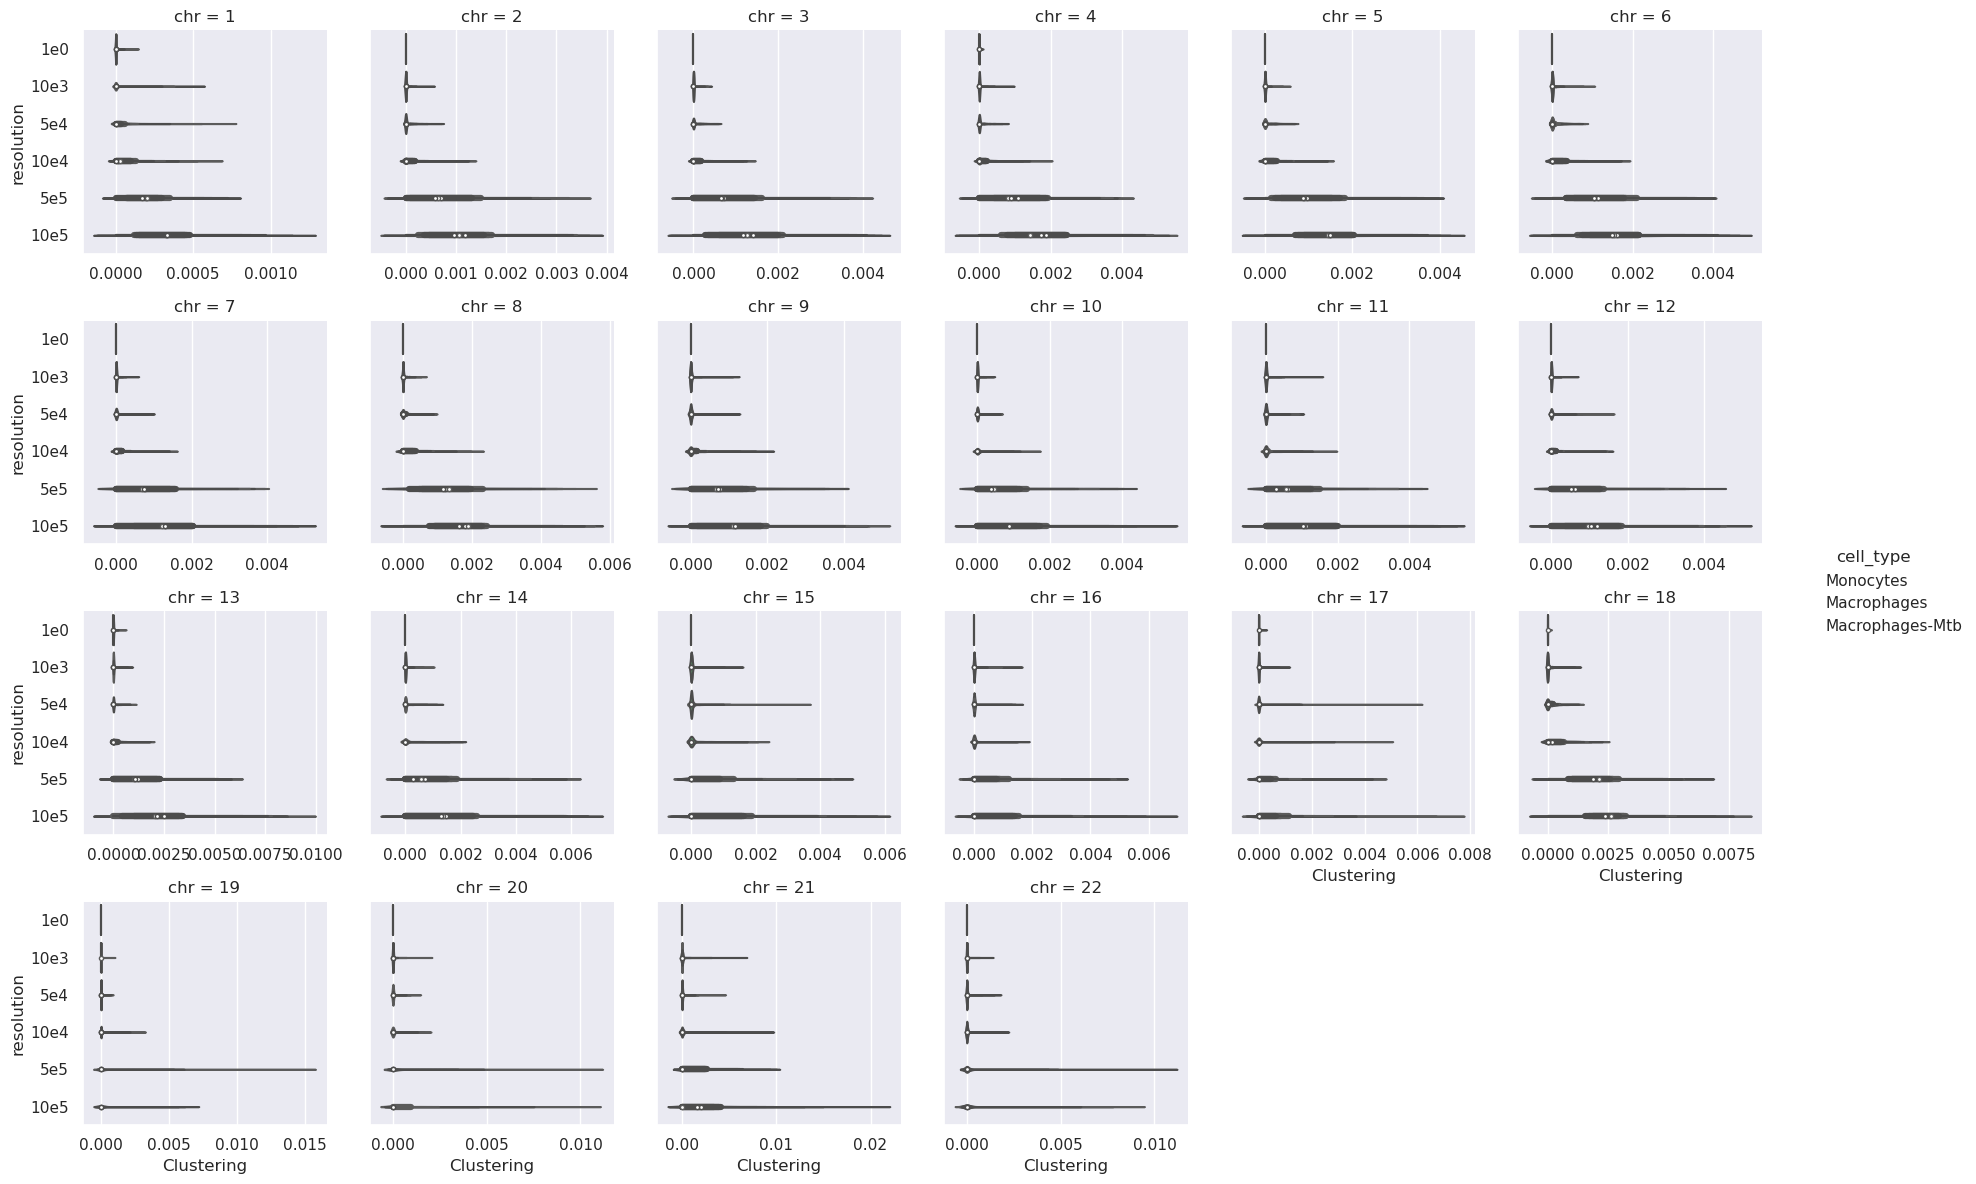

In [69]:
sns.set_theme(rc={'figure.figsize':(20,8.27)})

g = sns.FacetGrid(df_all_chroms_resolutions, 
                  col="chr", 
                  hue = "cell_type",  
                  col_wrap=6,
                  sharex=False)

g.map(sns.violinplot, 
      "Clustering",
      "resolution",
      label = cell_type,
      fill=False,
      native_scale=True
)
g.add_legend()

plt.savefig(f'{save_images_path}/Clustering_violin_all_chr_all_res_v2.png')

/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/sit

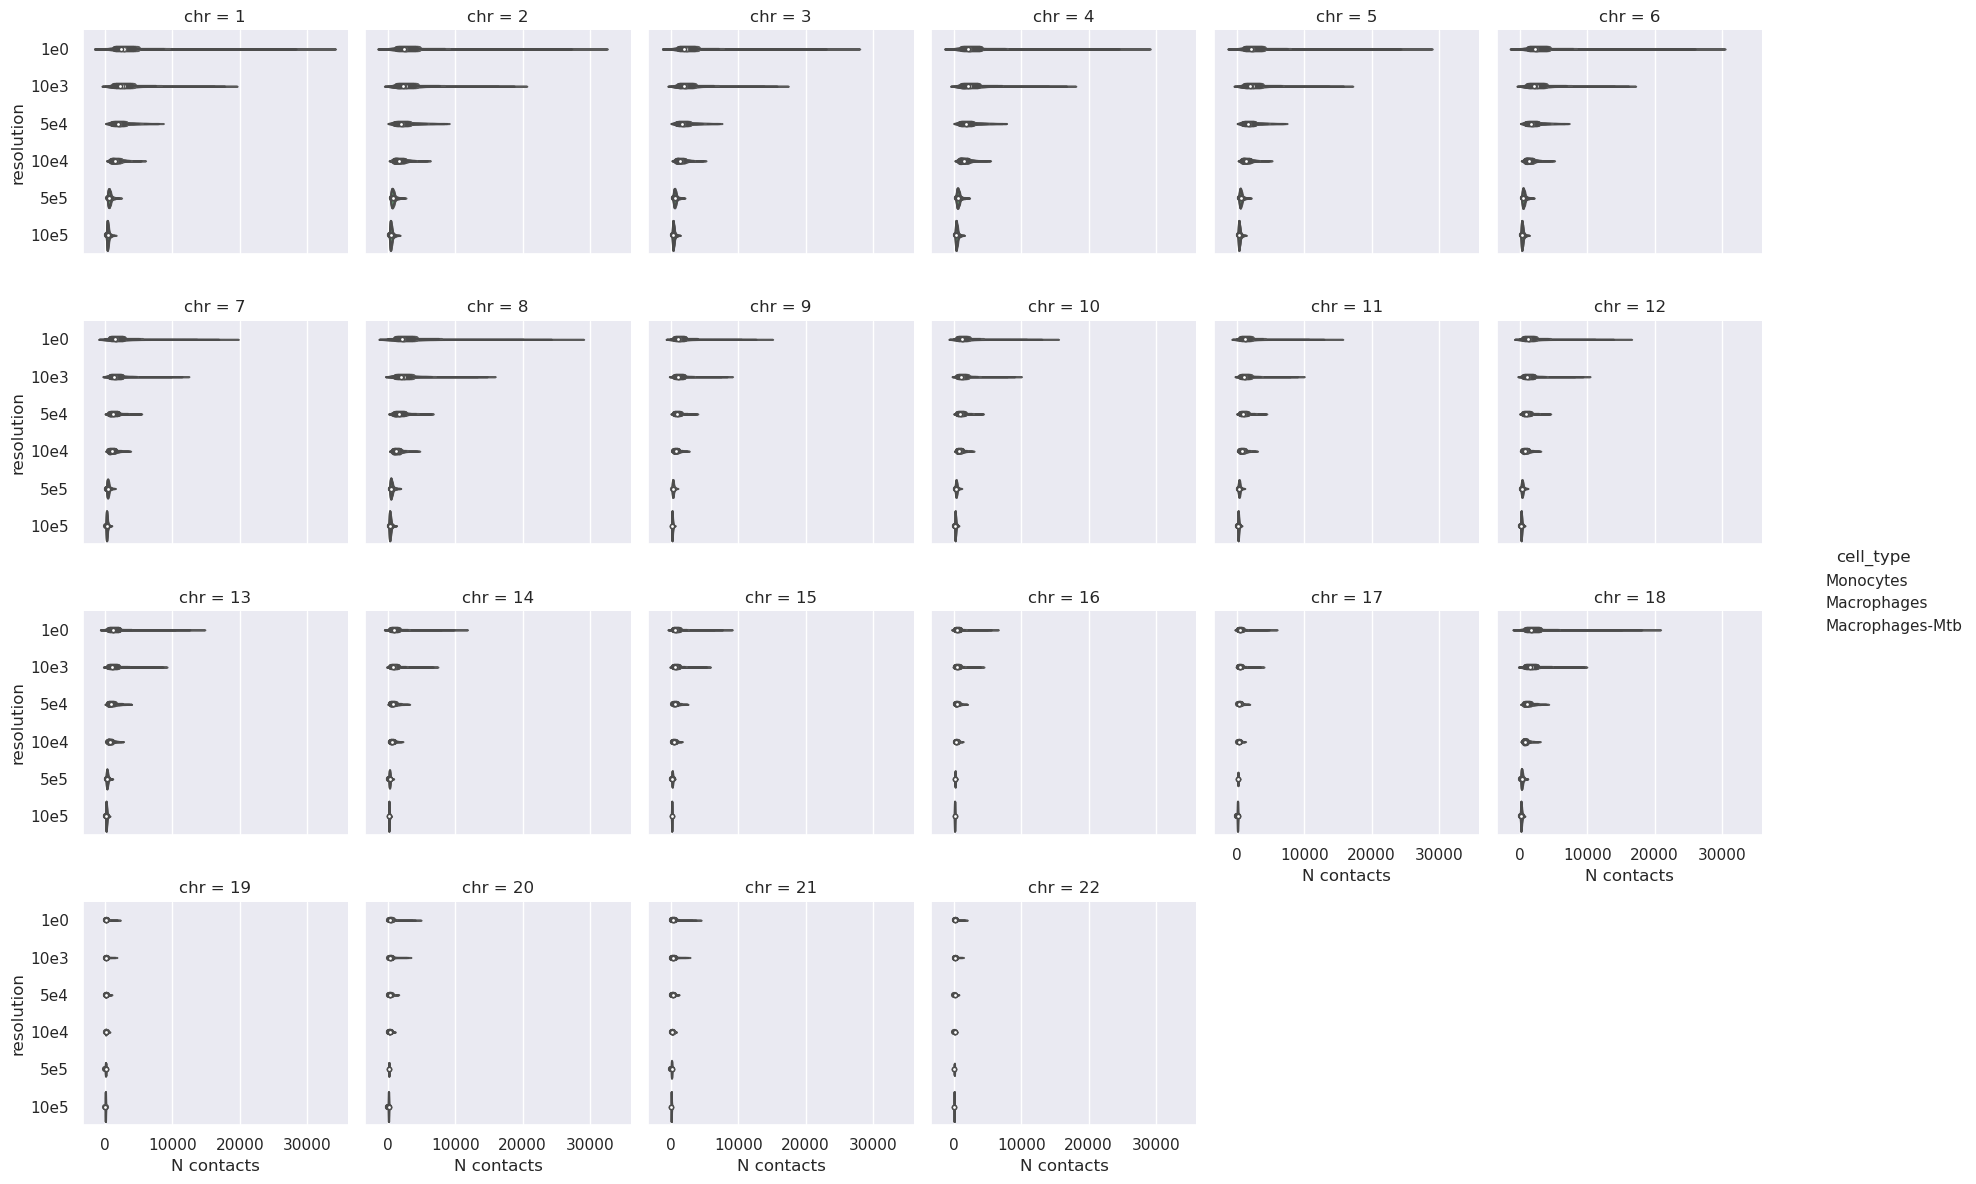

In [70]:
sns.set_theme(rc={'figure.figsize':(20,8.27)})

g = sns.FacetGrid(df_all_chroms_resolutions, 
                  col="chr", 
                  hue = "cell_type",  
                  col_wrap=6,
                  sharex=True)

g.map(sns.violinplot, 
      "N contacts",
      "resolution",
      label = cell_type,
      fill=False,
      native_scale=True
)
g.add_legend()

plt.savefig(f'{save_images_path}/N_contacts_violin_all_chr_all_res_v2.png')

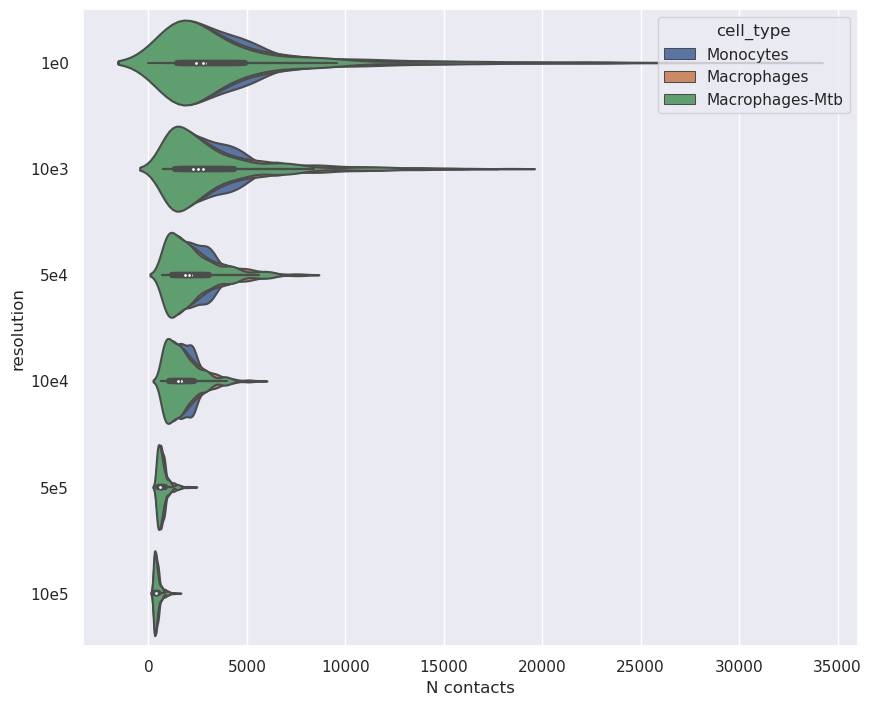

In [71]:
sns.set_theme(rc={'figure.figsize':(10,8.27)})
color_list = sns.color_palette("hls", 3)

sns.violinplot(
    data=df_all_chroms_resolutions[df_all_chroms_resolutions['chr']==1], 
      x="N contacts",
      y="resolution",
      label = cell_type,
      dodge = False,
      hue = 'cell_type',
      # inner="point",
      fill=False,
      native_scale=True,  
    )
g.add_legend()

# plt.savefig(f'{save_images_path}/N_contacts_violin_all_chr_all_res_v2.png')

### Calculating statistics and comparing CT parameters between cell types at a certain resolution

In [105]:
from scipy.stats import kruskal

df_all_cell_types = df_all_chroms_cell_types[df_all_chroms_cell_types["chr"]=='2']

# Extracting the data for each cell type
data_monocytes1 = df_all_cell_types[df_all_cell_types["cell_type"] == "Monocytes"]["Entangled"]
data_macrophages1 = df_all_cell_types[df_all_cell_types["cell_type"] == "Macrophages"]["Entangled"]
data_macrophages_mtb1 = df_all_cell_types[df_all_cell_types["cell_type"] == "Macrophages-Mtb"]["Entangled"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_monocytes1, data_macrophages1, data_macrophages_mtb1)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('There is a statistically significant difference between at least two cell types.')
else:
    print('There is no statistically significant difference between the cell types.')
print("Kruskal-Wallis Test Statistic:", statistic)
print("P-Value:", p_value)

There is no statistically significant difference between the cell types.
Kruskal-Wallis Test Statistic: nan
P-Value: nan


In [177]:
def add_pvalue_annotation(pvalue, x1, x2, y, ax):
    if pvalue > 0.05:
        ax.plot([x1, x2], [y, y], lw=1, c='k')
        ax.text((x1 + x2) * 0.5, y, "> 0.05", ha='center', va='bottom', fontsize=12)
    else:
        ax.plot([x1, x2], [y, y], lw=1, c='k')
        ax.text((x1 + x2) * 0.5, y, f"{pvalue:.3f}", ha='center', va='bottom', fontsize=12)

def add_pvalue_annotations(ax,data, cell_types,metric):
    pvalues = [
        sci_stats.kruskal(data[data["cell_type"]==cell_types[i]][metric],
                          data[data["cell_type"]==cell_types[j]][metric]).pvalue
        
        for i in range(len(cell_types))
        for j in range(i+1, len(cell_types))
    ]
    
    x_coords = [i for i in range(len(cell_types))]

    y = max(data[metric])*1.1
    for i in range(len(cell_types) - 1):
        for j in range(i+1, len(cell_types)):
            add_pvalue_annotation(pvalues.pop(0), x_coords[i], x_coords[j], y , ax)
            y+=(max(data[metric])-min(data[metric]))/6

#### Custom resolution
In this code the desired resolution and matrice can be selected.

/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/sit

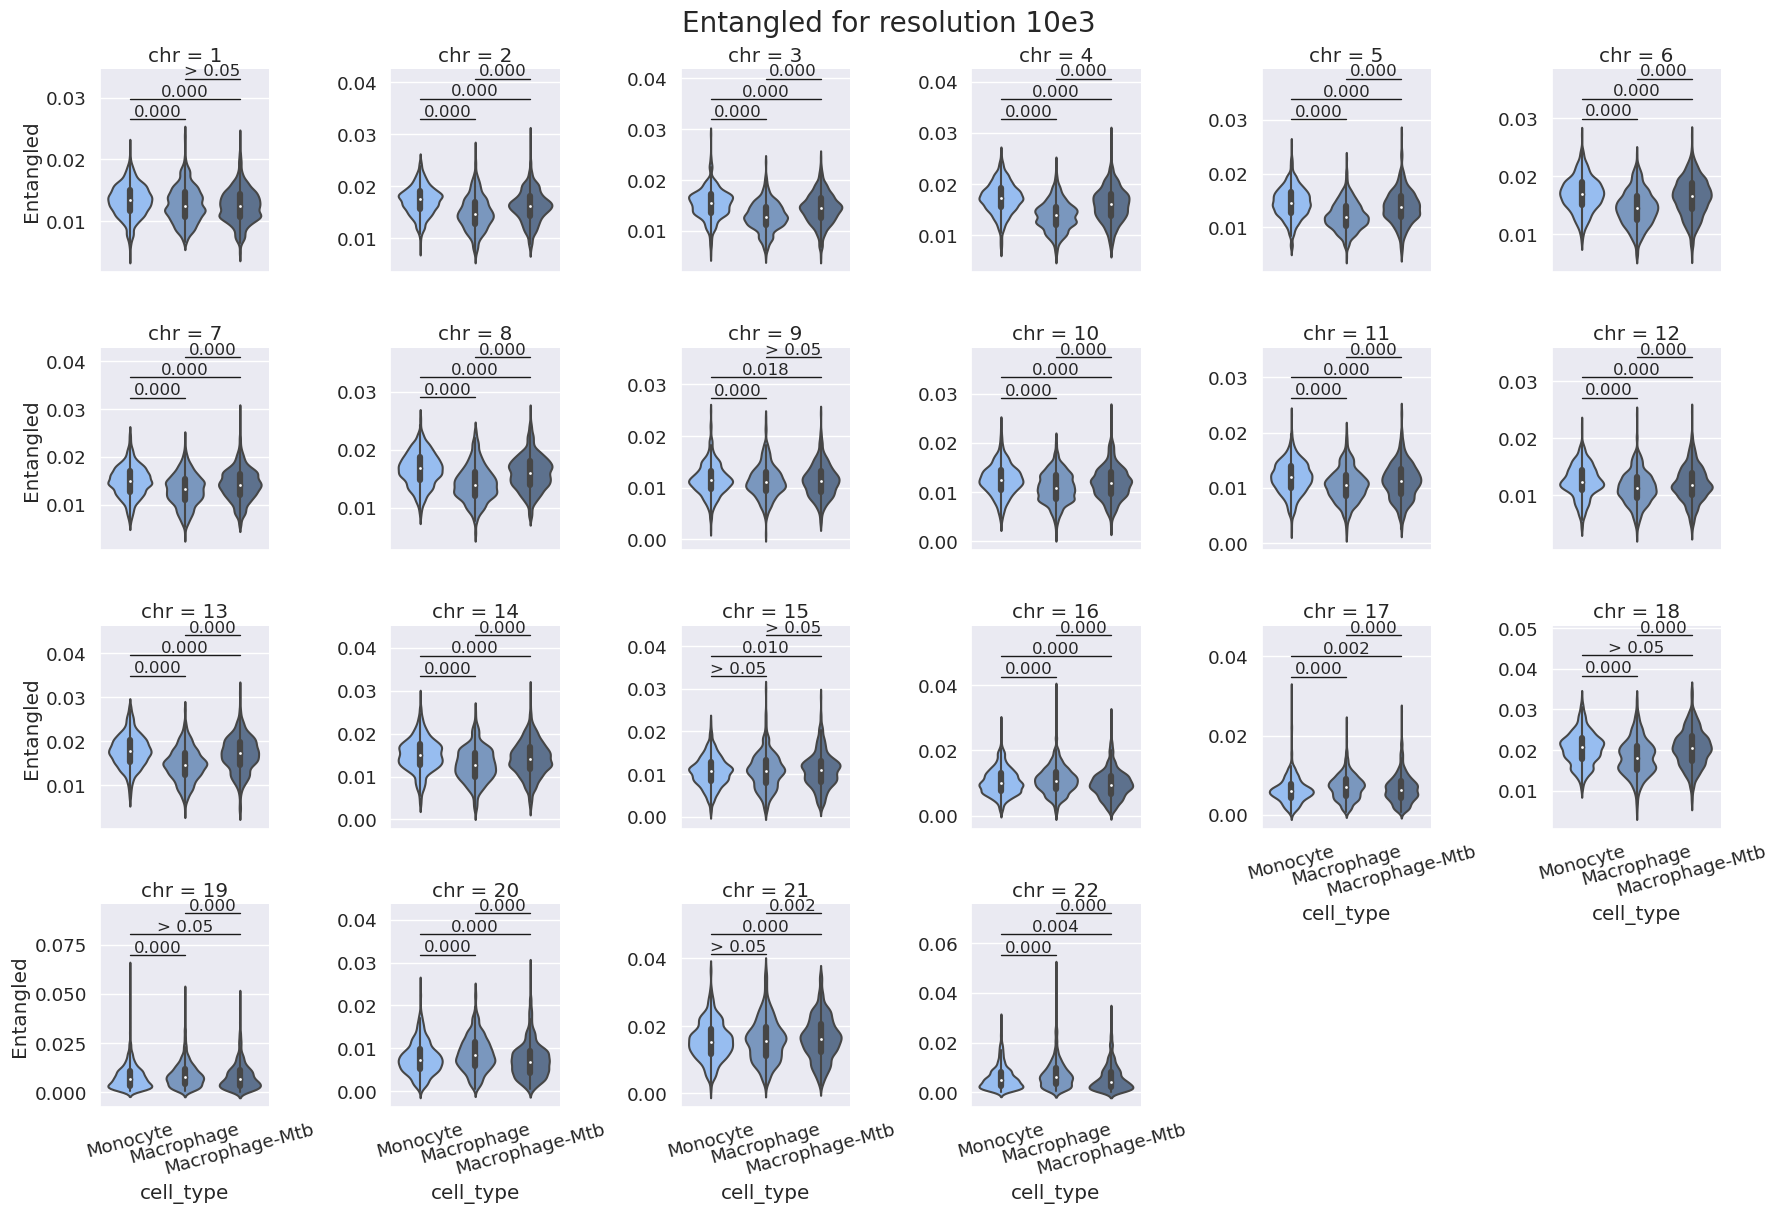

In [204]:
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)
cell_types = ['Monocytes', 'Macrophages', 'Macrophages-Mtb'] 
selected_resolution =  "10e3"
selected_metric = "Entangled"
# selected_metric = "Fractal dimension"


#Plotting
sns.set_theme(rc={'figure.figsize': (20, 8.27)})

df_resolution = df_all_chroms_resolutions[df_all_chroms_resolutions["resolution"] == selected_resolution]

sns.set(font_scale=1.2)
g = sns.FacetGrid(df_resolution,
                  col="chr",
                  col_wrap=6,
                  sharey=False,
                  sharex=True,
                  # palette=custom_palette
                 )


g.map(sns.violinplot,
      "cell_type",
      selected_metric,
      palette=subcat_palette,
      fill=False,
     )



g.fig.suptitle(f'Entangled for resolution {selected_resolution}')
g.figure.subplots_adjust(top=.93)

# Add p-value annotations for each subplot (assuming you have a function add_pvalue_annotations)
for ax, chr in zip(g.axes.flat, df_resolution["chr"]):
    data = df_resolution[df_resolution["chr"] == chr]
    
    add_pvalue_annotations(ax, data, cell_types, metric=selected_metric)


for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=15)
# sns.FacetGrid.add_legend(legend_data="cell_types", title="Cell types", label_order=['Monocyte', 'Macrophage', 'Macrophage-Mtb'] , adjust_subtitles=True, **kwargs)



plt.xticks(np.arange(3),['Monocyte', 'Macrophage', 'Macrophage-Mtb'] )


plt.savefig(f'/home/msbb/Figures_for_thesis/Entangled_p-value_{selected_resolution}')

plt.show()

## Saving p-values in a dataframe to compare

In [64]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal

# Assuming you have a function to calculate p-values
cell_types = ['Monocyte', 'Macrophage', 'Macrophage-Mtb'] 
selected_resolution =  "1"
selected_metric = "Entangled"
df_resolution = df_all_chroms_cell_types[df_all_chroms_cell_types[selected_metric] != 0]

def calculate_p_values(data, cell_types, metric):
    p_values = []
    for i in range(len(cell_types)):
        for j in range(i+1, len(cell_types)):
            cell_type1 = cell_types[i]
            cell_type2 = cell_types[j]
            group1 = data[data["cell_type"] == cell_type1][metric]
            group2 = data[data["cell_type"] == cell_type2][metric]
            p_val = kruskal(group1, group2).pvalue
            p_values.append(p_val)
    return p_values

# Initialize an empty dataframe to store p-values
p_values_df = pd.DataFrame(columns=["Chr", "Monocyte vs. Macrophage", "Monocyte vs. Macrophage-Mtb", "Macrophage vs. Macrophage-Mtb"])

# Iterate through each chromosome
for chr_num in df_resolution["chr"].unique():
    data_chr = df_resolution[df_resolution["chr"] == chr_num]
    p_values = calculate_p_values(data_chr, cell_types, selected_metric)
    p_values_df = p_values_df.append({
        "Chr": chr_num,
        "Monocyte vs. Macrophage": p_values[0],
        "Monocyte vs. Macrophage-Mtb": p_values[1],
        "Macrophage vs. Macrophage-Mtb": p_values[2]
    }, ignore_index=True)

# Define a function to update p-values
def update_p_values(p_value):
    if p_value > 0.05:
        return "insignificant"
    else:
        return p_value

# Iterate through each cell in the dataframe and update p-values
for column in p_values_df.columns[1:]:  # Exclude the "Chr" column
    p_values_df[column] = p_values_df[column].apply(update_p_values)

# Print the dataframe
print(p_values_df)

# Specify the directory where you want to save the CSV file
save_path = "/media/msbb/ssd2/Yasmine_copy/results_Sci/P_values_comparison"

# Save the dataframe to a CSV file in the specified directory
p_values_df.to_csv(f"{save_path}/p_values_dataframe_for_{selected_resolution}.csv", index=False)



     Chr Monocyte vs. Macrophage Monocyte vs. Macrophage-Mtb  \
0    1.0                0.001464                    0.000002   
1    2.0                     0.0                         0.0   
2    3.0                     0.0                    0.000001   
3    4.0                     0.0                         0.0   
4    5.0                     0.0                     0.00008   
5    6.0                     0.0                    0.002194   
6    7.0                     0.0                    0.000137   
7    8.0                     0.0                    0.000679   
8    9.0                0.023997                    0.015676   
9   10.0                     0.0                     0.00017   
10  11.0                     0.0                    0.000027   
11  12.0                     0.0                    0.000727   
12  13.0                     0.0                    0.000979   
13  14.0                     0.0                    0.000017   
14  15.0           insignificant        

/tmp/ipykernel_10955/3494672072.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_values_df = p_values_df.append({
/tmp/ipykernel_10955/3494672072.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_values_df = p_values_df.append({
/tmp/ipykernel_10955/3494672072.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_values_df = p_values_df.append({
/tmp/ipykernel_10955/3494672072.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_values_df = p_values_df.append({
/tmp/ipykernel_10955/3494672072.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

In [112]:
from scipy.stats import shapiro

# Assuming df_all_chroms_cell_types is your DataFrame containing the data
# Extracting the column containing the data to be tested for normality
data_to_test = df_all_chroms_cell_types["Fractal dimension"]

# Perform Shapiro-Wilk test
statistic, p_value = shapiro(data_to_test)

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')
print("Shapiro-Wilk Test Statistic:", statistic)
print("P-Value:", p_value)

Data does not look Gaussian (reject H0)
Shapiro-Wilk Test Statistic: 0.8198794722557068
P-Value: 0.0


/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [76]:
from scipy.stats import kruskal


# Extracting the data for each cell type
data_monocytes = df_all_chroms_cell_types[df_all_chroms_cell_types["cell_type"] == "Monocytes"]["Entangled"]
data_macrophages = df_all_chroms_cell_types[df_all_chroms_cell_types["cell_type"] == "Macrophages"]["Entangled"]
data_macrophages_mtb = df_all_chroms_cell_types[df_all_chroms_cell_types["cell_type"] == "Macrophages-Mtb"]["Entangled"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_monocytes, data_macrophages, data_macrophages_mtb)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('There is a statistically significant difference between at least two cell types.')
else:
    print('There is no statistically significant difference between the cell types.')
print("Kruskal-Wallis Test Statistic:", statistic)
print("P-Value:", p_value)

There is a statistically significant difference between at least two cell types.
Kruskal-Wallis Test Statistic: 192.59823333459235
P-Value: 1.5060001642685367e-42


In [77]:
import scikit_posthocs as sp

# Conduct Kruskal-Wallis test
statistic, p_value = kruskal(data_monocytes, data_macrophages, data_macrophages_mtb)

# Perform Dunn's test as post-hoc analysis
posthoc_dunn = sp.posthoc_dunn([data_monocytes, data_macrophages, data_macrophages_mtb])

# Set significance level for post-hoc tests
alpha = 0.05

# Print results of post-hoc test
if p_value < alpha:
    print('Kruskal-Wallis test indicates a statistically significant difference between at least two cell types.')
    print('Pairwise differences between cell types:')
    print(posthoc_dunn)
else:
    print('Kruskal-Wallis test did not find a statistically significant difference between the cell types.')

Kruskal-Wallis test indicates a statistically significant difference between at least two cell types.
Pairwise differences between cell types:
              1             2             3
1  1.000000e+00  3.724600e-41  5.603485e-03
2  3.724600e-41  1.000000e+00  3.575444e-24
3  5.603485e-03  3.575444e-24  1.000000e+00


In [57]:
##for entangled

In [58]:

from scipy.stats import shapiro

# Assuming df_all_chroms_cell_types is your DataFrame containing the data
# Extracting the column containing the data to be tested for normality
data_to_test = df_all_chroms_cell_types["Entangled"]

# Perform Shapiro-Wilk test
statistic, p_value = shapiro(data_to_test)

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')
print("Shapiro-Wilk Test Statistic:", statistic)
print("P-Value:", p_value)

Data does not look Gaussian (reject H0)
Shapiro-Wilk Test Statistic: 0.7485235929489136
P-Value: 0.0


/home/msbb/anaconda3/envs/sci_Hi-C/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [59]:
from scipy.stats import kruskal

# Assuming df_all_chroms_cell_types is your DataFrame containing the data
# Extracting the data for each cell type
data_monocytes = df_all_chroms_cell_types[df_all_chroms_cell_types["cell_type"] == "Monocytes"]["Entangled"]
data_macrophages = df_all_chroms_cell_types[df_all_chroms_cell_types["cell_type"] == "Macrophages"]["Entangled"]
data_macrophages_mtb = df_all_chroms_cell_types[df_all_chroms_cell_types["cell_type"] == "Macrophages-Mtb"]["Entangled"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_monocytes, data_macrophages, data_macrophages_mtb)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('There is a statistically significant difference between at least two cell types.')
else:
    print('There is no statistically significant difference between the cell types.')
print("Kruskal-Wallis Test Statistic:", statistic)
print("P-Value:", p_value)

There is no statistically significant difference between the cell types.
Kruskal-Wallis Test Statistic: nan
P-Value: nan


In [61]:
#for chroms

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Setting the theme and figure size
sns.set_theme(rc={'figure.figsize':(20, 8.27)})


# Creating a violin plot for all cell types combined
sns.violinplot(data=df_all_chroms_cell_types, x="chr", y="Fractal dimension", hue= 'cell_type', split=True, inner="quartiles")
plt.title('Violin Plot for Fractal dimension across Chromosomes for All Cell Types')
plt.xlabel('Chromosome')
plt.ylabel('Fractal dimension')
plt.legend(title='Cell Type')
plt.show()

# Perform Kruskal-Wallis test for all cell types combined
chromosomes = df_all_chroms_cell_types["chr"].unique()
cell_types = df_all_chroms_cell_types["cell_type"].unique()

for cell_type in cell_types:
    data_per_cell_type = df_all_chroms_cell_types[df_all_chroms_cell_types["cell_type"] == cell_type]
    groups = [data_per_cell_type[data_per_cell_type["chr"] == chr]["Fractal dimension"] for chr in chromosomes]
    statistic, p_value = kruskal(*groups)
   
    # Print Kruskal-Wallis test result
    alpha = 0.05
    if p_value < alpha:
        print(f'Kruskal-Wallis test indicates a statistically significant difference in Fractal dimension among chromosomes for {cell_type}.')
    else:
        print(f'Kruskal-Wallis test did not find a statistically significant difference in Fractal dimension among chromosomes for {cell_type}.')
    print("Kruskal-Wallis Test Statistic:", statistic)
    print("P-Value:", p_value)

ValueError: There must be exactly two hue levels to use `split`.'

In [57]:
# Load all cells data
directory = "/media/msbb/ssd2/Yasmine_copy/results_Sci/CT_parameters_Macrophages/Top_parameters_V300067419_L03_1.cell.AACCGTCG.sorted.pairs.csv"
df = pd.read_csv(directory, sep=',')

# Create entangled fraction and normalized fractal dimension
df['entangled'] = df['Parallel (%)'] + df['Cross (%)']
df['Norm Fractal dimension'] = df['Fractal dimension'] / df['N contacts']
df = df.rename(columns={'Unnamed: 0': 'chr'})

set_layout()

In [60]:
cell_types = ['Monocytes','Macrophages','Macrophages-Mtb']
color_list = sns.color_palette("hls", 3)
df_list_cell_type = []
discretisation_steps = [10e3,5e4,10e4,5e5,10e5]

for i,step in enumerate(discretisation_steps[:]):
    step=int(discretisation_steps)
    
for cell_type in cell_types:
    input_path = f'/media/msbb/ssd2/Yasmine_copy/Single_Cell_HiC/Sci_Pairs_resolutions_{cell_type}/{step}'
    save_images_path = '/media/msbb/ssd2/Yasmine_copy/results_Sci/images'
    input_files = os.listdir(input_path)
    input_files = [input_file for input_file in input_files if input_file.endswith(".pairs.csv")]
    input_files_names = [input_file[:-4] for input_file in input_files]
    input_files_paths = [f"{input_path}/{input_file}" for input_file in input_files]


    df_list = []
    # CT_prop_cells_all_df = pd.DataFrame()
    # Loop through each pairs file in the directory

    for input_file_name,input_file_path in zip(input_files_names[:],input_files_paths[:]):

        # Load all cells data
        df = pd.read_csv(input_file_path, sep=',')

        # Create entangled fraction and normalized fractal dimension
        df['entangled'] = df['Parallel (%)'] + df['Cross (%)']
        df['Norm Fractal dimension'] = df['Fractal dimension'] / df['N contacts']
        df = df.rename(columns={'Unnamed: 0': 'chr'})
        df_list.append(df)

        set_layout()

    df_all_chroms = pd.concat(df_list, ignore_index=True)
    # df_all_chroms['cell_type'] = 
    df_list_cell_type.append(df_all_chroms)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [ ]:
#Packages installed

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from itertools import combinations
import pandas as pd
import os

In [ ]:
# Assuming df_all_chroms_resolutions is DataFrame containing the data

# Calculate p-values for each pair of resolutions within each chromosome
chromosomes = df_all_chroms_resolutions["chr"].unique()
resolutions = df_all_chroms_resolutions["resolution"].unique()
p_values = {}

for chromosome in chromosomes:
    p_values[chromosome] = {}
    for resolution_pair in combinations(resolutions, 2):
        resolution1, resolution2 = resolution_pair
        data_resolution1 = df_all_chroms_resolutions[(df_all_chroms_resolutions["chr"] == chromosome) & (df_all_chroms_resolutions["resolution"] == resolution1)]["Fractal dimension"]
        data_resolution2 = df_all_chroms_resolutions[(df_all_chroms_resolutions["chr"] == chromosome) & (df_all_chroms_resolutions["resolution"] == resolution2)]["Fractal dimension"]
        kruskal_result = kruskal(data_resolution1, data_resolution2)
        p_values[chromosome][f"{resolution1} - {resolution2}"] = kruskal_result.pvalue

# Create FacetGrid for each chromosome
g = sns.FacetGrid(df_all_chroms_resolutions,
                  col="chr",
                  hue="cell_type",
                  col_wrap=6,
                  sharex=False
                 )

# Map violin plots to the FacetGrid
g.map(sns.violinplot,
      "Fractal dimension",
      "resolution",
      label="cell_type",
      fill=False,
      native_scale=True,
      inner = "quart",
      split=True
     )

# Add legend
g.add_legend()

# Add p-value as brackets between different resolutions
for ax, chromosome in zip(g.axes.flat, chromosomes):
    for i, (resolution1, resolution2) in enumerate(combinations(resolutions, 2)):
        p_value = p_values[chromosome][f"{resolution1} - {resolution2}"]
        if p_value < 0.05:  # Adjust significance level as needed
            ax.annotate("", xy=(1.2, i), xytext=(1.2, i + 0.4), arrowprops=dict(arrowstyle="-[, widthB=0.6, lengthB=0.6", lw=1.5))
            ax.text(1.2, i + 0.2, f"p={p_value:.2f}", ha='center', va='center', fontsize=8)

# Save the plot
# plt.savefig(f'{save_images_path}/Fractal_dimension_violin_all_chr_all_res.png')

In [ ]:
g.axes

## Plotting with annotation 

In [ ]:
dir(utils)

In [ ]:
# Calculate p-values for each pair of resolutions within each chromosome
chromosomes = df_all_chroms_resolutions["chr"].unique()
cell_type_differences = df_all_chroms_resolutions["cell_type"].unique()
p_values = {}

for chromosome in chromosomes:
    p_values[chromosome] = {}
    for cell_type_pair in combinations(cell_type_differences, 2):
        cell_type1, cell_type2 = cell_type_pair
        data_cell_type1 = df_all_chroms_resolutions[(df_all_chroms_resolutions["chr"] == chromosome) & (df_all_chroms_resolutions["cell_type"] == cell_type1)]["Entangled"]
        data_cell_type2 = df_all_chroms_resolutions[(df_all_chroms_resolutions["chr"] == chromosome) & (df_all_chroms_resolutions["cell_type"] == cell_type2)]["Entangled"]
        kruskal_result = kruskal(data_cell_type1, data_cell_type2)
        p_values[chromosome][f"{cell_type1} - {cell_type2}"] = kruskal_result.pvalue

# Create FacetGrid for each chromosome
g = sns.FacetGrid(df_all_chroms_resolutions,
                  col="chr",
                  hue="cell_type",
                  col_wrap=6,
                  sharex=False
                 )

# Map violin plots to the FacetGrid
g.map(sns.boxplot,
      "Entangled",
      "cell_type",
      label="cell_type",
      fill=False,
      native_scale=True,
      inner = "quart",
      split=True
     )

# Add legend
g.add_legend()

# Add pairs
pairs = [('Monocyte', 'Macrophage'),
         ('Macrophage', 'Macrophage-Mtb'),
         ('Monocyte', 'Macrophage-Mtb')]

# Add p-value as brackets between different resolutions
for ax, chromosome in zip(g.axes.flat, chromosomes):
    for i, (cell_type1, cell_type2) in enumerate(combinations(resolutions, 2)):
        p_value = p_values[chromosome][f"{cell_type1} - {cell_type2}"]
        if p_value < 0.05:  # Adjust significance level as needed
            annotator = Annotator(ax, pairs, **plotting_parameters)
            annotator.set_custom_annotations(formatted_pvalues)
            annotator.annotate()



            
           # ax.annotate("", xy=(1.2, i), xytext=(1.2, i + 0.4), arrowprops=dict(arrowstyle="-[, widthB=0.6, lengthB=0.6", lw=1.5))
           # ax.text(1.2, i + 0.2, f"p={p_value:.2f}", ha='center', va='center', fontsize=8)

In [ ]:
from statannotations.Annotator import Annotator

In [ ]:
cell_types = ['Monocyte', 'Macrophage', 'Macrophage-Mtb'] 
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5) 

# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
plotting_parameters = {
    'data':    df_all_chroms_resolutions[df_all_chroms_resolutions["resolution"]=="10e3"],
    'x':       'cell_type',
    'y':       'Entangled',
    'palette': subcat_palette[1:]
}

pairs = [('Monocyte', 'Macrophage'),
         ('Macrophage', 'Macrophage-Mtb'),
         ('Monocyte', 'Macrophage-Mtb')]

with sns.plotting_context('notebook', font_scale = 1.4):

    # Plot with seaborn
    for ax, chromosome in zip(g.axes.flat, chromosomes):
       for chromosome in chromosomes:
           data_per_chromosome = df_all_chroms_cell_types[df_all_chroms_cell_types["chr"] == chromosome]
           sns.violinplot(**plotting_parameters)
    
           # Add annotations
           annotator = Annotator(ax, pairs, **plotting_parameters)
           annotator.set_custom_annotations(formatted_pvalues)
           annotator.annotate()

           annotator.new_plot(ax, pairs=pairs, **plotting_parameters)
           annotator.configure(test='Kruskal', verbose=True).apply_and_annotate()

           # Label and show
           # Settings the canvas
           fig, ax= plt.subplots(figsize=(18, 6))
           ax.set_xlabel('') 
           ax.set_ylabel('Measures')

           # setting log axis
           ax.set_xscale('log')
           


plt.show()

In [ ]:
from scipy.stats import shapiro
import pandas as pd


# Test the distribution of the "Entangled" parameter within each stage of macrophage
cell_types = ['Monocyte', 'Macrophage', 'Macrophage-Mtb']
for cell_type in cell_types:
    data_cell_type = df_all_chroms_resolutions[df_all_chroms_resolutions["cell_type"] == cell_type]["Entangled"]
    stat, p_value = shapiro(data_cell_type)
    print(f"Stage of Macrophage: {cell_type}")
    print(f"   Shapiro-Wilk test statistic: {stat:.4f}, p-value: {p_value:.10f}")

The Shapiro-Wilk test results indicate that the p-values for all three stages of macrophage (Monocyte, Macrophage, and Macrophage-Mtb) are extremely low, suggesting strong evidence against the null hypothesis of normality. Therefore, we reject the assumption of normality for the "Entangled" parameter within each stage of macrophage.

In [ ]:
# Perform the Wilcoxon signed-rank test for each pair of resolutions within each stage of macrophage for the "Entangled" parameter
cell_types = ['Monocyte', 'Macrophage', 'Macrophage-Mtb']
wilcoxon_results = {}

for cell_type in cell_types:
    wilcoxon_results[cell_type] = {}
    data_cell_type = df_all_chroms_resolutions[df_all_chroms_resolutions["cell_type"] == cell_type]
    resolutions = data_cell_type["resolution"].unique()
    for resolution_pair in combinations(resolutions, 2):
        resolution1, resolution2 = resolution_pair
        data_resolution1 = data_cell_type[data_cell_type["resolution"] == resolution1]["Entangled"]
        data_resolution2 = data_cell_type[data_cell_type["resolution"] == resolution2]["Entangled"]
        # Ensure data arrays have the same length
        min_length = min(len(data_resolution1), len(data_resolution2))
        _, p_value = wilcoxon(data_resolution1[:min_length], data_resolution2[:min_length])  # Use the minimum length
        wilcoxon_results[cell_type][f"{resolution1} - {resolution2}"] = p_value

# Print the results
for cell_type, resolution_p_values in wilcoxon_results.items():
    print(f"Stage of Macrophage: {cell_type}")
    for resolution_pair, p_value in resolution_p_values.items():
        print(f"   {resolution_pair}: p-value = {p_value:.10f}")

In [ ]:
# Perform the Wilcoxon signed-rank test for each pair of resolutions within each stage of macrophage for the "Entangled" parameter
cell_types = ['Monocyte', 'Macrophage', 'Macrophage-Mtb']
wilcoxon_results = {}

for cell_type in cell_types:
    wilcoxon_results[cell_type] = {}
    data_cell_type = df_all_chroms_resolutions[df_all_chroms_resolutions["cell_type"] == cell_type]
    resolutions = data_cell_type["resolution"].unique()
    for resolution_pair in combinations(resolutions, 2):
        resolution1, resolution2 = resolution_pair
        data_resolution1 = data_cell_type[data_cell_type["resolution"] == resolution1]["Fractal dimension"]
        data_resolution2 = data_cell_type[data_cell_type["resolution"] == resolution2]["Fractal dimension"]
        # Ensure data arrays have the same length
        min_length = min(len(data_resolution1), len(data_resolution2))
        _, p_value = wilcoxon(data_resolution1[:min_length], data_resolution2[:min_length])  # Use the minimum length
        wilcoxon_results[cell_type][f"{resolution1} - {resolution2}"] = p_value

# Print the results
for cell_type, resolution_p_values in wilcoxon_results.items():
    print(f"Stage of Macrophage: {cell_type}")
    for resolution_pair, p_value in resolution_p_values.items():
        print(f"   {resolution_pair}: p-value = {p_value:.10f}")

--> the p-value only shows zeros--> indicating not suitable test (because of sample size and similiraty)

In [ ]:
# Calculate Cohen's d for each pair of resolutions within each stage of macrophage
cell_types = ['Monocyte', 'Macrophage', 'Macrophage-Mtb']
cohen_d_results = {}

for cell_type in cell_types:
    cohen_d_results[cell_type] = {}
    data_cell_type = df_all_chroms_resolutions[df_all_chroms_resolutions["cell_type"] == cell_type]
    resolutions = data_cell_type["resolution"].unique()
    for resolution_pair in combinations(resolutions, 2):
        resolution1, resolution2 = resolution_pair
        data_resolution1 = data_cell_type[data_cell_type["resolution"] == resolution1]["Entangled"]
        data_resolution2 = data_cell_type[data_cell_type["resolution"] == resolution2]["Entangled"]
        mean_diff = np.mean(data_resolution1) - np.mean(data_resolution2)
        pooled_std = np.sqrt((np.std(data_resolution1, ddof=1)**2 + np.std(data_resolution2, ddof=1)**2) / 2)
        cohen_d = mean_diff / pooled_std
        cohen_d_results[cell_type][f"{resolution1} - {resolution2}"] = cohen_d

# Print the results
for cell_type, resolution_cohen_d_values in cohen_d_results.items():
    print(f"Stage of Macrophage: {cell_type}")
    for resolution_pair, cohen_d in resolution_cohen_d_values.items():
        print(f"   {resolution_pair}: Cohen's d = {cohen_d:.4f}")

In [ ]:
# Calculate Cohen's d for each pair of resolutions within each stage of macrophage
cell_types = ['Monocyte', 'Macrophage', 'Macrophage-Mtb']
cohen_d_results = {}

for cell_type in cell_types:
    cohen_d_results[cell_type] = {}
    data_cell_type = df_all_chroms_resolutions[df_all_chroms_resolutions["cell_type"] == cell_type]
    resolutions = data_cell_type["resolution"].unique()
    for resolution_pair in combinations(resolutions, 2):
        resolution1, resolution2 = resolution_pair
        data_resolution1 = data_cell_type[data_cell_type["resolution"] == resolution1]["N contacts"]
        data_resolution2 = data_cell_type[data_cell_type["resolution"] == resolution2]["N contacts"]
        mean_diff = np.mean(data_resolution1) - np.mean(data_resolution2)
        pooled_std = np.sqrt((np.std(data_resolution1, ddof=1)**2 + np.std(data_resolution2, ddof=1)**2) / 2)
        cohen_d = mean_diff / pooled_std
        cohen_d_results[cell_type][f"{resolution1} - {resolution2}"] = cohen_d

# Print the results
for cell_type, resolution_cohen_d_values in cohen_d_results.items():
    print(f"Stage of Macrophage: {cell_type}")
    for resolution_pair, cohen_d in resolution_cohen_d_values.items():
        print(f"   {resolution_pair}: Cohen's d = {cohen_d:.4f}")

In [ ]:
# Calculate Cohen's d for each pair of resolutions within each stage of macrophage
cell_types = ['Monocyte', 'Macrophage', 'Macrophage-Mtb']
cohen_d_results = {}

for cell_type in cell_types:
    cohen_d_results[cell_type] = {}
    data_cell_type = df_all_chroms_resolutions[df_all_chroms_resolutions["cell_type"] == cell_type]
    resolutions = data_cell_type["resolution"].unique()
    for resolution_pair in combinations(resolutions, 2):
        resolution1, resolution2 = resolution_pair
        data_resolution1 = data_cell_type[data_cell_type["resolution"] == resolution1]["Fractal dimension"]
        data_resolution2 = data_cell_type[data_cell_type["resolution"] == resolution2]["Fractal dimension"]
        mean_diff = np.mean(data_resolution1) - np.mean(data_resolution2)
        pooled_std = np.sqrt((np.std(data_resolution1, ddof=1)**2 + np.std(data_resolution2, ddof=1)**2) / 2)
        cohen_d = mean_diff / pooled_std
        cohen_d_results[cell_type][f"{resolution1} - {resolution2}"] = cohen_d

# Print the results
for cell_type, resolution_cohen_d_values in cohen_d_results.items():
    print(f"Stage of Macrophage: {cell_type}")
    for resolution_pair, cohen_d in resolution_cohen_d_values.items():
        print(f"   {resolution_pair}: Cohen's d = {cohen_d:.4f}")

In [148]:

# Compare summary statistics for each pair of resolutions within each stage of macrophage Entangled
cell_types = ['Monocyte', 'Macrophage', 'Macrophage-Mtb']

for cell_type in cell_types:
    print(f"Stage of Macrophage: {cell_type}")
    data_cell_type = df_all_chroms_resolutions[df_all_chroms_resolutions["cell_type"] == cell_type]
    resolutions = data_cell_type["resolution"].unique()
    for resolution_pair in combinations(resolutions, 2):
        resolution1, resolution2 = resolution_pair
        data_resolution1 = data_cell_type[data_cell_type["resolution"] == resolution1]["Entangled"]
        data_resolution2 = data_cell_type[data_cell_type["resolution"] == resolution2]["Entangled"]
        print(f"   Resolution Pair: {resolution1} - {resolution2}")
        print(f"      Mean ({resolution1}): {data_resolution1.mean():.4f}, Std Deviation: {data_resolution1.std(ddof=1):.4f}")
        print(f"      Mean ({resolution2}): {data_resolution2.mean():.4f}, Std Deviation: {data_resolution2.std(ddof=1):.4f}")

Stage of Macrophage: Monocyte
   Resolution Pair: 10e3 - 5e4
      Mean (10e3): 0.0133, Std Deviation: 0.0054
      Mean (5e4): 0.0169, Std Deviation: 0.0079
   Resolution Pair: 10e3 - 10e4
      Mean (10e3): 0.0133, Std Deviation: 0.0054
      Mean (10e4): 0.0214, Std Deviation: 0.0115
   Resolution Pair: 10e3 - 5e5
      Mean (10e3): 0.0133, Std Deviation: 0.0054
      Mean (5e5): 0.0532, Std Deviation: 0.0325
   Resolution Pair: 10e3 - 10e5
      Mean (10e3): 0.0133, Std Deviation: 0.0054
      Mean (10e5): 0.0845, Std Deviation: 0.0487
   Resolution Pair: 5e4 - 10e4
      Mean (5e4): 0.0169, Std Deviation: 0.0079
      Mean (10e4): 0.0214, Std Deviation: 0.0115
   Resolution Pair: 5e4 - 5e5
      Mean (5e4): 0.0169, Std Deviation: 0.0079
      Mean (5e5): 0.0532, Std Deviation: 0.0325
   Resolution Pair: 5e4 - 10e5
      Mean (5e4): 0.0169, Std Deviation: 0.0079
      Mean (10e5): 0.0845, Std Deviation: 0.0487
   Resolution Pair: 10e4 - 5e5
      Mean (10e4): 0.0214, Std Deviation:

In [149]:


# Compare summary statistics for each pair of resolutions within each stage of macrophage
cell_types = ['Monocyte', 'Macrophage', 'Macrophage-Mtb']

for cell_type in cell_types:
    print(f"Stage of Macrophage: {cell_type}")
    data_cell_type = df_all_chroms_resolutions[df_all_chroms_resolutions["cell_type"] == cell_type]
    resolutions = data_cell_type["resolution"].unique()
    for resolution_pair in combinations(resolutions, 2):
        resolution1, resolution2 = resolution_pair
        data_resolution1 = data_cell_type[data_cell_type["resolution"] == resolution1]["Fractal dimension"]
        data_resolution2 = data_cell_type[data_cell_type["resolution"] == resolution2]["Fractal dimension"]
        print(f"   Resolution Pair: {resolution1} - {resolution2}")
        print(f"      Mean ({resolution1}): {data_resolution1.mean():.4f}, Std Deviation: {data_resolution1.std(ddof=1):.4f}")
        print(f"      Mean ({resolution2}): {data_resolution2.mean():.4f}, Std Deviation: {data_resolution2.std(ddof=1):.4f}")

Stage of Macrophage: Monocyte
   Resolution Pair: 10e3 - 5e4
      Mean (10e3): 1.2131, Std Deviation: 0.1506
      Mean (5e4): 1.2359, Std Deviation: 0.1710
   Resolution Pair: 10e3 - 10e4
      Mean (10e3): 1.2131, Std Deviation: 0.1506
      Mean (10e4): 1.2716, Std Deviation: 0.1955
   Resolution Pair: 10e3 - 5e5
      Mean (10e3): 1.2131, Std Deviation: 0.1506
      Mean (5e5): 1.3740, Std Deviation: 0.2530
   Resolution Pair: 10e3 - 10e5
      Mean (10e3): 1.2131, Std Deviation: 0.1506
      Mean (10e5): 1.4020, Std Deviation: 0.2784
   Resolution Pair: 5e4 - 10e4
      Mean (5e4): 1.2359, Std Deviation: 0.1710
      Mean (10e4): 1.2716, Std Deviation: 0.1955
   Resolution Pair: 5e4 - 5e5
      Mean (5e4): 1.2359, Std Deviation: 0.1710
      Mean (5e5): 1.3740, Std Deviation: 0.2530
   Resolution Pair: 5e4 - 10e5
      Mean (5e4): 1.2359, Std Deviation: 0.1710
      Mean (10e5): 1.4020, Std Deviation: 0.2784
   Resolution Pair: 10e4 - 5e5
      Mean (10e4): 1.2716, Std Deviation: